In [1]:
import cv2

In [17]:
img=cv2.imread('first.jpg')

In [19]:
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
img.shape

(683, 1023, 3)

In [15]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [20]:
cv2.imshow('webcam',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
gray.shape

(683, 1023)

In [29]:
type(gray[0][0])

numpy.uint8

In [34]:
hs= cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imshow('window 1',hs)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
hs.shape

(683, 1023, 3)

In [39]:
vid = cv2.VideoCapture('video.mp4')
while True:
    try:
        _,frame= vid.read()
        cv2.imshow('window2',frame)
    except :
        pass
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

In [42]:
img[0]

array([[237, 234, 230],
       [238, 235, 231],
       [236, 234, 233],
       ...,
       [109, 108, 112],
       [108, 107, 111],
       [108, 107, 111]], dtype=uint8)

# Lect 2

In [2]:
img=cv2.imread('photo.jpg')
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
reImg = cv2.resize(img,(700,500))
cv2.imshow('webcam',reImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
gray= cv2.cvtColor(reImg,cv2.COLOR_BGR2GRAY)
cv2.imshow('webcam',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
canny_img= cv2.Canny(gray,80,80)
cv2.imshow('Ankit',canny_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
import numpy as np
kernel = np.ones((1,3),'uint8')
erode= cv2.erode(canny_img,kernel,iterations=1)
cv2.imshow('Ankit',erode)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
kernel = np.ones((2,2),'uint8')
dilate= cv2.dilate(erode,kernel,iterations=3)
cv2.imshow('Ankit',dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

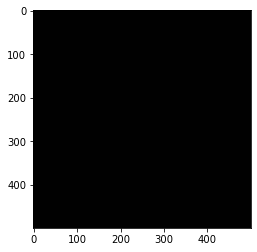

In [30]:
import numpy as np
from matplotlib import pyplot as plt
blank = np.ones((500,500,3),'uint8')
plt.imshow(blank)

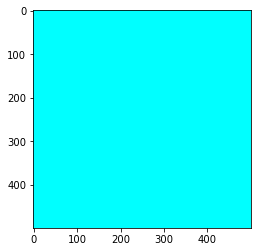

In [33]:
blank[:] = [0,255,255]
plt.imshow(blank)

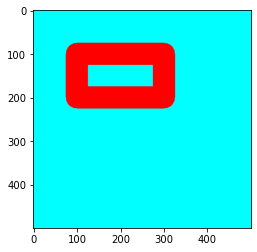

In [18]:
cv2.rectangle(blank,(100,100),(300,200),(255,0,0),50)
plt.imshow(blank)

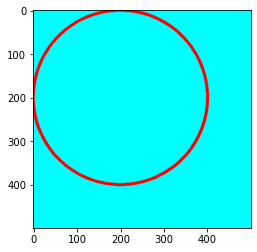

In [34]:
plt.imshow(cv2.circle(blank,(200,200),200,(255,0,0),5))


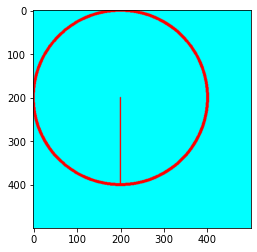

In [23]:
img3=cv2.line(blank,(200,200),(200,400),(255,0,0),2)
plt.imshow(img3)


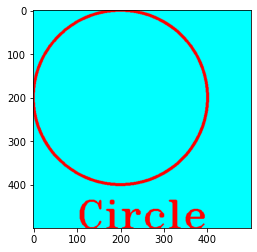

In [35]:
cv2.putText(blank,"Circle",(100,500),cv2.FONT_HERSHEY_TRIPLEX,3,(255,0,0),3)
plt.imshow(blank)

In [39]:
vid = cv2.VideoCapture(0)
while True:
    try:
        _,frame= vid.read()
        cv2.imshow('window2',frame)
    except :
        pass
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

Color Detection

In [22]:
import numpy as np
vid = cv2.VideoCapture(0)
while(1 ) :
    _,frame= vid.read()
    frame = cv2.flip(frame,1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    red_L =np.array([50,85,110],'uint8')
    red_U = np.array([60,250,250],'uint8')
    redM = cv2.inRange(hsv,red_L,red_U)
    kernel = np.ones((5,5),'uint8')
    redM = cv2.dilate(redM,kernel)
    conts,_ = cv2.findContours(redM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for cont in conts :
        area = cv2.contourArea(cont)
        if(area>100) :
            x,y,w,h =cv2.boundingRect(cont)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(frame,"Red Color",(x,y),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255))
    cv2.imshow("win1",frame)
    if cv2.waitKey(1)==ord('q'):
        break;
        
cv2.destroyAllWindows()

# Lec 3

Mediapipe Intro

In [1]:
!pip install mediapipe

  Using cached opencv_contrib_python-4.5.5.62-cp36-abi3-win_amd64.whl (42.2 MB)


In [14]:
import mediapipe as mp
import cv2
import numpy as np

In [15]:
drawing_details = mp.solutions.drawing_utils
hands_details= mp.solutions.hands

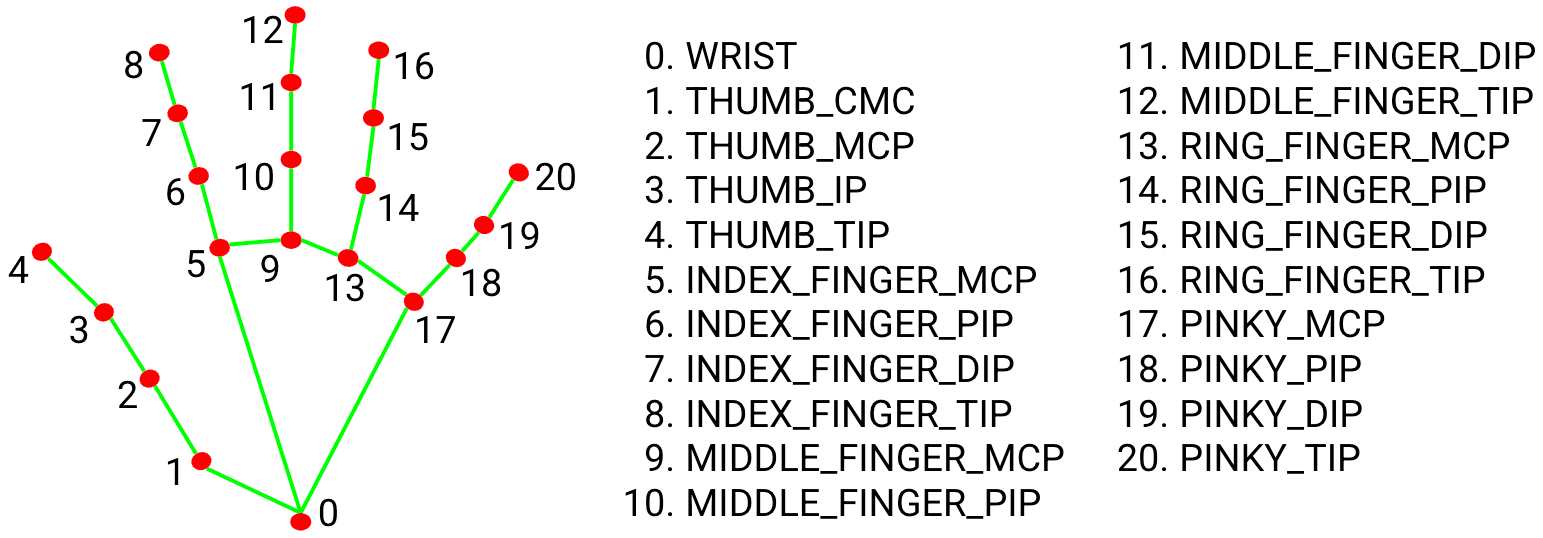

In [17]:
mp_face_detection = mp.solutions.face_detection
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    img=cv2.imread('first.jpg')
    res = face_detection.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    if  res.detections :
        for detection in res.detections :
            drawing_details.draw_detection(img,detection)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture(0)
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res = face_detection.process(frame)
        if  res.detections :
            for detection in res.detections :
                drawing_details.draw_detection(frame,detection)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

face Mesh 

In [19]:
mp_mesh_detection = mp.solutions.face_mesh
with mp_mesh_detection.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as mesh_detection:
    img=cv2.imread('photo.jpg')
    res = mesh_detection.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    if  res.multi_face_landmarks:
        for mesh in res.multi_face_landmarks :
            drawing_details.draw_landmarks(img, landmark_list=mesh)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
mp_mesh_detection = mp.solutions.face_mesh
cap = cv2.VideoCapture(0)
with mp_mesh_detection.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as mesh_detection:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res =  mesh_detection.process(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
        if  res.multi_face_landmarks :
            for mesh in res.multi_face_landmarks :
                drawing_details.draw_landmarks(frame,mesh)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

In [21]:
mp_hands= mp.solutions.hands
with mp_hands.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5) as hands:
    img=cv2.imread('first.jpg')
    res = hands.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    if  res.multi_hand_landmarks:
        for mesh in res.multi_hand_landmarks :
            drawing_details.draw_landmarks(img,mesh)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Hand Detection

In [4]:
cap = cv2.VideoCapture(0)
mp_hands= mp.solutions.hands
with mp_hands.Hands(min_detection_confidence=0.5,min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res = hands.process(frame)
        if  res.multi_hand_landmarks :
            for mesh in res.multi_hand_landmarks :
                drawing_details.draw_landmarks(frame,mesh,mp_hands.HAND_CONNECTIONS)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

In [22]:
cap = cv2.VideoCapture(0)
mp_hands= mp.solutions.hands
with mp_hands.Hands(min_detection_confidence=0.2,min_tracking_confidence=0.2) as hands:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res = hands.process(frame)
        frame_height,frame_width,_ = frame.shape
        if  res.multi_hand_landmarks :
            for mesh in res.multi_hand_landmarks :
                print('hand_landmarks:',mesh)
                print(
                      f'Index finger tip coordinates: (',
                      f'{mesh.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * frame_width}, '
                      f'{mesh.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * frame_height})'
                     )
                drawing_details.draw_landmarks(frame,mesh,mp_hands.HAND_CONNECTIONS)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

hand_landmarks: landmark {
  x: -0.011321663856506348
  y: 0.9218543767929077
  z: 4.31196042427473e-07
}
landmark {
  x: 0.07190369814634323
  y: 0.9593284130096436
  z: -0.015835022553801537
}
landmark {
  x: 0.1607166826725006
  y: 0.9495880603790283
  z: -0.024253960698843002
}
landmark {
  x: 0.22703050076961517
  y: 0.9318529367446899
  z: -0.03675786033272743
}
landmark {
  x: 0.28183361887931824
  y: 0.9262857437133789
  z: -0.05047612264752388
}
landmark {
  x: 0.17670784890651703
  y: 0.834728479385376
  z: -0.010252673178911209
}
landmark {
  x: 0.230277419090271
  y: 0.7826963067054749
  z: -0.04448358714580536
}
landmark {
  x: 0.27167272567749023
  y: 0.7924407720565796
  z: -0.06944269686937332
}
landmark {
  x: 0.3061647415161133
  y: 0.8109745979309082
  z: -0.08569175004959106
}
landmark {
  x: 0.15115958452224731
  y: 0.8029330968856812
  z: -0.0223560594022274
}
landmark {
  x: 0.2184431403875351
  y: 0.784255862236023
  z: -0.07457048445940018
}
landmark {
  x: 0.2

hand_landmarks: landmark {
  x: 0.022302240133285522
  y: 0.9378224611282349
  z: 3.0538964779225353e-07
}
landmark {
  x: 0.10110508650541306
  y: 0.9531817436218262
  z: -0.008404756896197796
}
landmark {
  x: 0.17454227805137634
  y: 0.9347338080406189
  z: -0.01879541203379631
}
landmark {
  x: 0.2310531735420227
  y: 0.9170529246330261
  z: -0.03629278391599655
}
landmark {
  x: 0.2817155122756958
  y: 0.9096029996871948
  z: -0.054363738745450974
}
landmark {
  x: 0.1970282793045044
  y: 0.8075014352798462
  z: 0.0016369736986234784
}
landmark {
  x: 0.2616494297981262
  y: 0.7697069048881531
  z: -0.027759592980146408
}
landmark {
  x: 0.3057279586791992
  y: 0.7715024948120117
  z: -0.047389909625053406
}
landmark {
  x: 0.3470863997936249
  y: 0.777299165725708
  z: -0.059007853269577026
}
landmark {
  x: 0.17216931283473969
  y: 0.7762754559516907
  z: -0.012357287108898163
}
landmark {
  x: 0.24496930837631226
  y: 0.7859219312667847
  z: -0.06310408562421799
}
landmark {
  

hand_landmarks: landmark {
  x: 0.03408217430114746
  y: 0.9385935664176941
  z: 4.3501924551492266e-07
}
landmark {
  x: 0.09789395332336426
  y: 0.9602123498916626
  z: -0.0124613456428051
}
landmark {
  x: 0.17061340808868408
  y: 0.9439433813095093
  z: -0.024968454614281654
}
landmark {
  x: 0.2236708253622055
  y: 0.9259061813354492
  z: -0.04233434423804283
}
landmark {
  x: 0.27270030975341797
  y: 0.9160506725311279
  z: -0.06082002446055412
}
landmark {
  x: 0.20180782675743103
  y: 0.8120048642158508
  z: -0.009299264289438725
}
landmark {
  x: 0.2651723623275757
  y: 0.7693850994110107
  z: -0.03836413100361824
}
landmark {
  x: 0.315310537815094
  y: 0.7613129615783691
  z: -0.05875088647007942
}
landmark {
  x: 0.35668134689331055
  y: 0.7579130530357361
  z: -0.07138817757368088
}
landmark {
  x: 0.17597661912441254
  y: 0.7794181108474731
  z: -0.02183639630675316
}
landmark {
  x: 0.24749460816383362
  y: 0.7571061253547668
  z: -0.06729623675346375
}
landmark {
  x: 0

hand_landmarks: landmark {
  x: 0.00032939016819000244
  y: 0.9688116312026978
  z: 7.964448514030664e-07
}
landmark {
  x: 0.06337342411279678
  y: 0.9978311061859131
  z: -0.028832511976361275
}
landmark {
  x: 0.1322866976261139
  y: 0.9927268028259277
  z: -0.05178094282746315
}
landmark {
  x: 0.18263597786426544
  y: 0.9892808198928833
  z: -0.07498258352279663
}
landmark {
  x: 0.2230149209499359
  y: 0.982147216796875
  z: -0.09864360839128494
}
landmark {
  x: 0.18116407096385956
  y: 0.8448829054832458
  z: -0.040835220366716385
}
landmark {
  x: 0.2572583556175232
  y: 0.78574538230896
  z: -0.08040203899145126
}
landmark {
  x: 0.31149548292160034
  y: 0.775275707244873
  z: -0.11060652881860733
}
landmark {
  x: 0.35678449273109436
  y: 0.7825191617012024
  z: -0.12959840893745422
}
landmark {
  x: 0.1526487022638321
  y: 0.8017676472663879
  z: -0.049375779926776886
}
landmark {
  x: 0.21894219517707825
  y: 0.7082383036613464
  z: -0.08745932579040527
}
landmark {
  x: 0

hand_landmarks: landmark {
  x: -0.06297775357961655
  y: 0.9036175608634949
  z: 9.441250199415663e-07
}
landmark {
  x: 0.004147734493017197
  y: 0.9016103744506836
  z: -0.040937747806310654
}
landmark {
  x: 0.07097021490335464
  y: 0.8682414293289185
  z: -0.061021581292152405
}
landmark {
  x: 0.13993868231773376
  y: 0.8380930423736572
  z: -0.07825404405593872
}
landmark {
  x: 0.20148855447769165
  y: 0.8251460194587708
  z: -0.093283511698246
}
landmark {
  x: 0.0600905604660511
  y: 0.682412326335907
  z: -0.013670925050973892
}
landmark {
  x: 0.1223762035369873
  y: 0.591391921043396
  z: -0.03546928986907005
}
landmark {
  x: 0.1654307246208191
  y: 0.5455805063247681
  z: -0.056653767824172974
}
landmark {
  x: 0.2056792676448822
  y: 0.5179766416549683
  z: -0.07035405188798904
}
landmark {
  x: 0.015859480947256088
  y: 0.6474598050117493
  z: -0.00754625303670764
}
landmark {
  x: 0.047834888100624084
  y: 0.5435227155685425
  z: -0.02322942018508911
}
landmark {
  x:

hand_landmarks: landmark {
  x: 0.0665949210524559
  y: 0.9051917791366577
  z: 7.929777439130703e-07
}
landmark {
  x: 0.15973110496997833
  y: 0.9117666482925415
  z: -0.03607919067144394
}
landmark {
  x: 0.2505500316619873
  y: 0.8678428530693054
  z: -0.05565965920686722
}
landmark {
  x: 0.32542791962623596
  y: 0.8333231210708618
  z: -0.0741281658411026
}
landmark {
  x: 0.3962309956550598
  y: 0.8263579607009888
  z: -0.0925743356347084
}
landmark {
  x: 0.25678664445877075
  y: 0.6811434626579285
  z: -0.022108444944024086
}
landmark {
  x: 0.3163042664527893
  y: 0.59229576587677
  z: -0.04815918579697609
}
landmark {
  x: 0.3578724265098572
  y: 0.5431159734725952
  z: -0.07095382362604141
}
landmark {
  x: 0.3956604599952698
  y: 0.5057041049003601
  z: -0.0872555747628212
}
landmark {
  x: 0.20835097134113312
  y: 0.6341238617897034
  z: -0.025152357295155525
}
landmark {
  x: 0.2561292052268982
  y: 0.5264393091201782
  z: -0.045800838619470596
}
landmark {
  x: 0.292863

hand_landmarks: landmark {
  x: 0.16350917518138885
  y: 0.7823646068572998
  z: 8.832469688968558e-07
}
landmark {
  x: 0.2602144181728363
  y: 0.8012208342552185
  z: -0.050602301955223083
}
landmark {
  x: 0.35459092259407043
  y: 0.7784368991851807
  z: -0.08048311620950699
}
landmark {
  x: 0.4351014196872711
  y: 0.7561438083648682
  z: -0.10848161578178406
}
landmark {
  x: 0.5114094018936157
  y: 0.7433239221572876
  z: -0.1355968564748764
}
landmark {
  x: 0.37604382634162903
  y: 0.5586854815483093
  z: -0.0303959958255291
}
landmark {
  x: 0.4518904983997345
  y: 0.47287532687187195
  z: -0.06302374601364136
}
landmark {
  x: 0.5011143684387207
  y: 0.42423760890960693
  z: -0.09402168542146683
}
landmark {
  x: 0.5479950904846191
  y: 0.38197240233421326
  z: -0.11734630912542343
}
landmark {
  x: 0.3300182819366455
  y: 0.49986177682876587
  z: -0.03143531456589699
}
landmark {
  x: 0.3866587281227112
  y: 0.38986849784851074
  z: -0.05731558799743652
}
landmark {
  x: 0.4

hand_landmarks: landmark {
  x: 0.14470228552818298
  y: 0.7403468489646912
  z: 7.51249444874702e-07
}
landmark {
  x: 0.19074025750160217
  y: 0.7648183703422546
  z: -0.0427963025867939
}
landmark {
  x: 0.2655491530895233
  y: 0.729308009147644
  z: -0.05901598185300827
}
landmark {
  x: 0.31800025701522827
  y: 0.6796423196792603
  z: -0.07149600982666016
}
landmark {
  x: 0.3679368495941162
  y: 0.637947142124176
  z: -0.08461903035640717
}
landmark {
  x: 0.29729071259498596
  y: 0.6100518703460693
  z: -0.028483983129262924
}
landmark {
  x: 0.3480083644390106
  y: 0.5553755760192871
  z: -0.052389923483133316
}
landmark {
  x: 0.3861807584762573
  y: 0.5089485049247742
  z: -0.0730978474020958
}
landmark {
  x: 0.4157354235649109
  y: 0.4731225371360779
  z: -0.08851340413093567
}
landmark {
  x: 0.2657420337200165
  y: 0.5588890314102173
  z: -0.024146590381860733
}
landmark {
  x: 0.31099557876586914
  y: 0.47391289472579956
  z: -0.04912884905934334
}
landmark {
  x: 0.3425

hand_landmarks: landmark {
  x: 0.15281987190246582
  y: 0.7564208507537842
  z: 1.9175223542333697e-07
}
landmark {
  x: 0.1988649070262909
  y: 0.774452269077301
  z: -0.033750906586647034
}
landmark {
  x: 0.2813834547996521
  y: 0.7138607501983643
  z: -0.047226883471012115
}
landmark {
  x: 0.3264769911766052
  y: 0.6386380195617676
  z: -0.06118994578719139
}
landmark {
  x: 0.3634899854660034
  y: 0.5657602548599243
  z: -0.07003949582576752
}
landmark {
  x: 0.3231671154499054
  y: 0.5678191184997559
  z: -0.005693322978913784
}
landmark {
  x: 0.37542784214019775
  y: 0.5002429485321045
  z: -0.04139452055096626
}
landmark {
  x: 0.37946319580078125
  y: 0.5302789211273193
  z: -0.05470804125070572
}
landmark {
  x: 0.35405904054641724
  y: 0.5664671659469604
  z: -0.05453630909323692
}
landmark {
  x: 0.2814149856567383
  y: 0.5295230746269226
  z: -0.006066680885851383
}
landmark {
  x: 0.3321644067764282
  y: 0.45188021659851074
  z: -0.04635009914636612
}
landmark {
  x: 0

hand_landmarks: landmark {
  x: 0.15202990174293518
  y: 0.7524566054344177
  z: 4.315044179747929e-07
}
landmark {
  x: 0.20183736085891724
  y: 0.7841229438781738
  z: -0.034067749977111816
}
landmark {
  x: 0.29862096905708313
  y: 0.73772132396698
  z: -0.0451766774058342
}
landmark {
  x: 0.3604629635810852
  y: 0.6784764528274536
  z: -0.055379074066877365
}
landmark {
  x: 0.411379337310791
  y: 0.6291866302490234
  z: -0.06493917852640152
}
landmark {
  x: 0.3261852264404297
  y: 0.5852860808372498
  z: -0.01432542409747839
}
landmark {
  x: 0.37466683983802795
  y: 0.5133355855941772
  z: -0.04609956219792366
}
landmark {
  x: 0.4019883871078491
  y: 0.5075333118438721
  z: -0.06515105068683624
}
landmark {
  x: 0.40403807163238525
  y: 0.5200798511505127
  z: -0.07352351397275925
}
landmark {
  x: 0.2862738072872162
  y: 0.5400649309158325
  z: -0.015226469375193119
}
landmark {
  x: 0.3403838276863098
  y: 0.4473832845687866
  z: -0.05587553232908249
}
landmark {
  x: 0.3369

hand_landmarks: landmark {
  x: 0.11777031421661377
  y: 0.7992990016937256
  z: 9.59185399551643e-07
}
landmark {
  x: 0.20977483689785004
  y: 0.8248178362846375
  z: -0.04976630210876465
}
landmark {
  x: 0.2984130382537842
  y: 0.8146864175796509
  z: -0.08264012634754181
}
landmark {
  x: 0.3744445741176605
  y: 0.8160643577575684
  z: -0.11383211612701416
}
landmark {
  x: 0.4453546404838562
  y: 0.8466577529907227
  z: -0.14424140751361847
}
landmark {
  x: 0.3446827232837677
  y: 0.5810261368751526
  z: -0.04701099544763565
}
landmark {
  x: 0.4361181855201721
  y: 0.49910011887550354
  z: -0.08302515745162964
}
landmark {
  x: 0.4925665259361267
  y: 0.451241672039032
  z: -0.11317217350006104
}
landmark {
  x: 0.5426213145256042
  y: 0.41009658575057983
  z: -0.13520406186580658
}
landmark {
  x: 0.29607999324798584
  y: 0.5191453695297241
  z: -0.050738364458084106
}
landmark {
  x: 0.36322158575057983
  y: 0.4010409712791443
  z: -0.08067766577005386
}
landmark {
  x: 0.407

hand_landmarks: landmark {
  x: 0.1037086695432663
  y: 0.7966350317001343
  z: 1.0649413297869614e-06
}
landmark {
  x: 0.18412701785564423
  y: 0.8310076594352722
  z: -0.05868448689579964
}
landmark {
  x: 0.26480281352996826
  y: 0.8418668508529663
  z: -0.10117774456739426
}
landmark {
  x: 0.3292454481124878
  y: 0.8787024021148682
  z: -0.14196333289146423
}
landmark {
  x: 0.3836348354816437
  y: 0.9443933963775635
  z: -0.18186819553375244
}
landmark {
  x: 0.33947351574897766
  y: 0.594355046749115
  z: -0.060427553951740265
}
landmark {
  x: 0.4391878843307495
  y: 0.5278130769729614
  z: -0.1027243360877037
}
landmark {
  x: 0.5046766996383667
  y: 0.48470354080200195
  z: -0.13591022789478302
}
landmark {
  x: 0.5597809553146362
  y: 0.4504759907722473
  z: -0.16013365983963013
}
landmark {
  x: 0.29734915494918823
  y: 0.5223942399024963
  z: -0.06393365561962128
}
landmark {
  x: 0.3716048300266266
  y: 0.40101364254951477
  z: -0.09777124226093292
}
landmark {
  x: 0.41

hand_landmarks: landmark {
  x: 0.0938454121351242
  y: 0.7825103998184204
  z: 9.090800858757575e-07
}
landmark {
  x: 0.159939244389534
  y: 0.7952221632003784
  z: -0.056133974343538284
}
landmark {
  x: 0.21976260840892792
  y: 0.7882930040359497
  z: -0.0968468114733696
}
landmark {
  x: 0.2611874043941498
  y: 0.7752298712730408
  z: -0.13673576712608337
}
landmark {
  x: 0.2987900972366333
  y: 0.8023138046264648
  z: -0.17516255378723145
}
landmark {
  x: 0.33769312500953674
  y: 0.5827261209487915
  z: -0.051498524844646454
}
landmark {
  x: 0.43405312299728394
  y: 0.5153073668479919
  z: -0.08984176814556122
}
landmark {
  x: 0.4960024356842041
  y: 0.46654248237609863
  z: -0.12097284197807312
}
landmark {
  x: 0.5459516048431396
  y: 0.4259091019630432
  z: -0.1443108767271042
}
landmark {
  x: 0.2973710596561432
  y: 0.515303909778595
  z: -0.05555126816034317
}
landmark {
  x: 0.3692689538002014
  y: 0.3989728093147278
  z: -0.08713653683662415
}
landmark {
  x: 0.412882

hand_landmarks: landmark {
  x: 0.0713951587677002
  y: 0.7761743664741516
  z: 9.689135822554817e-07
}
landmark {
  x: 0.1376863420009613
  y: 0.7807157039642334
  z: -0.06504149734973907
}
landmark {
  x: 0.19444505870342255
  y: 0.7661082744598389
  z: -0.11173825711011887
}
landmark {
  x: 0.23950493335723877
  y: 0.7563328742980957
  z: -0.15582653880119324
}
landmark {
  x: 0.2901782989501953
  y: 0.7857818603515625
  z: -0.19853025674819946
}
landmark {
  x: 0.2946974039077759
  y: 0.5385580062866211
  z: -0.06579618901014328
}
landmark {
  x: 0.38108029961586
  y: 0.4537322223186493
  z: -0.10495368391275406
}
landmark {
  x: 0.43682053685188293
  y: 0.38676995038986206
  z: -0.13406366109848022
}
landmark {
  x: 0.47932538390159607
  y: 0.3352847695350647
  z: -0.15600235760211945
}
landmark {
  x: 0.24478060007095337
  y: 0.474818617105484
  z: -0.06734903901815414
}
landmark {
  x: 0.3071296513080597
  y: 0.3407061994075775
  z: -0.10005392879247665
}
landmark {
  x: 0.34261

hand_landmarks: landmark {
  x: 0.8802919387817383
  y: 0.8277546167373657
  z: 4.90081788484531e-07
}
landmark {
  x: 0.783890426158905
  y: 0.7625012993812561
  z: -0.03127060830593109
}
landmark {
  x: 0.7191139459609985
  y: 0.6342251896858215
  z: -0.045740459114313126
}
landmark {
  x: 0.6880381107330322
  y: 0.5221841335296631
  z: -0.05821722373366356
}
landmark {
  x: 0.6564851403236389
  y: 0.4230916500091553
  z: -0.07090282440185547
}
landmark {
  x: 0.7741003036499023
  y: 0.46654534339904785
  z: -0.025096872821450233
}
landmark {
  x: 0.7389702796936035
  y: 0.3337330222129822
  z: -0.05471600219607353
}
landmark {
  x: 0.7117352485656738
  y: 0.2542564272880554
  z: -0.08141487836837769
}
landmark {
  x: 0.683194100856781
  y: 0.18637341260910034
  z: -0.1037052720785141
}
landmark {
  x: 0.838697075843811
  y: 0.462730348110199
  z: -0.037773456424474716
}
landmark {
  x: 0.834865152835846
  y: 0.31562915444374084
  z: -0.06264659017324448
}
landmark {
  x: 0.814981639

hand_landmarks: landmark {
  x: 0.8714986443519592
  y: 0.8172808885574341
  z: 2.1106382064317586e-07
}
landmark {
  x: 0.7797854542732239
  y: 0.7491308450698853
  z: -0.031235434114933014
}
landmark {
  x: 0.7189756631851196
  y: 0.6216355562210083
  z: -0.047224100679159164
}
landmark {
  x: 0.6885995268821716
  y: 0.5142262578010559
  z: -0.06142227351665497
}
landmark {
  x: 0.6578126549720764
  y: 0.4179282784461975
  z: -0.07521490007638931
}
landmark {
  x: 0.7862646579742432
  y: 0.4620503783226013
  z: -0.027594931423664093
}
landmark {
  x: 0.7557843923568726
  y: 0.3279688358306885
  z: -0.05689731612801552
}
landmark {
  x: 0.7252718210220337
  y: 0.25048401951789856
  z: -0.08230043947696686
}
landmark {
  x: 0.6928560137748718
  y: 0.18679726123809814
  z: -0.10304137319326401
}
landmark {
  x: 0.8496304750442505
  y: 0.4630962908267975
  z: -0.04036731645464897
}
landmark {
  x: 0.8472592830657959
  y: 0.31782370805740356
  z: -0.06554067879915237
}
landmark {
  x: 0.8

hand_landmarks: landmark {
  x: 0.9208760261535645
  y: 0.8250138759613037
  z: -1.4224447397737094e-07
}
landmark {
  x: 0.8196794986724854
  y: 0.7122535109519958
  z: 0.014552022330462933
}
landmark {
  x: 0.7667464017868042
  y: 0.5899103879928589
  z: -0.004375362768769264
}
landmark {
  x: 0.7226899862289429
  y: 0.5094651579856873
  z: -0.029020924121141434
}
landmark {
  x: 0.6781619191169739
  y: 0.4564509093761444
  z: -0.054363399744033813
}
landmark {
  x: 0.8914483785629272
  y: 0.4806378185749054
  z: -0.04808277264237404
}
landmark {
  x: 0.8353651165962219
  y: 0.321591317653656
  z: -0.10166818648576736
}
landmark {
  x: 0.7664527297019958
  y: 0.2536885440349579
  z: -0.13711854815483093
}
landmark {
  x: 0.7061372995376587
  y: 0.22546261548995972
  z: -0.15732668340206146
}
landmark {
  x: 0.9057512283325195
  y: 0.5137394070625305
  z: -0.08286069333553314
}
landmark {
  x: 0.8520951867103577
  y: 0.3227907419204712
  z: -0.1382921189069748
}
landmark {
  x: 0.7594

hand_landmarks: landmark {
  x: 0.11175424605607986
  y: 0.7675107717514038
  z: 9.157666340797732e-07
}
landmark {
  x: 0.1985159069299698
  y: 0.7080262899398804
  z: -0.03706679120659828
}
landmark {
  x: 0.2742863893508911
  y: 0.6068482398986816
  z: -0.06339173018932343
}
landmark {
  x: 0.33503592014312744
  y: 0.536398708820343
  z: -0.08928242325782776
}
landmark {
  x: 0.3987296223640442
  y: 0.483158677816391
  z: -0.11541765183210373
}
landmark {
  x: 0.2028457522392273
  y: 0.4268643856048584
  z: -0.0384223572909832
}
landmark {
  x: 0.24051980674266815
  y: 0.3023870587348938
  z: -0.07914429903030396
}
landmark {
  x: 0.2844812273979187
  y: 0.2470458596944809
  z: -0.1094796434044838
}
landmark {
  x: 0.33049941062927246
  y: 0.21224206686019897
  z: -0.12981541454792023
}
landmark {
  x: 0.1515800654888153
  y: 0.4245937764644623
  z: -0.04855005815625191
}
landmark {
  x: 0.16763955354690552
  y: 0.28149545192718506
  z: -0.08589724451303482
}
landmark {
  x: 0.22296

hand_landmarks: landmark {
  x: 0.02599998563528061
  y: 0.7734946012496948
  z: 8.998708267426991e-07
}
landmark {
  x: 0.12880763411521912
  y: 0.6629036664962769
  z: 0.014030731283128262
}
landmark {
  x: 0.17880283296108246
  y: 0.540873110294342
  z: -0.007825149223208427
}
landmark {
  x: 0.22533610463142395
  y: 0.4623914659023285
  z: -0.03725191950798035
}
landmark {
  x: 0.2663893401622772
  y: 0.404307097196579
  z: -0.06828455626964569
}
landmark {
  x: 0.08036062121391296
  y: 0.4030272364616394
  z: -0.08053705841302872
}
landmark {
  x: 0.16861145198345184
  y: 0.2558645009994507
  z: -0.14442531764507294
}
landmark {
  x: 0.2601640820503235
  y: 0.24103468656539917
  z: -0.18247002363204956
}
landmark {
  x: 0.32324105501174927
  y: 0.25321948528289795
  z: -0.20483653247356415
}
landmark {
  x: 0.06010502576828003
  y: 0.45711514353752136
  z: -0.120688796043396
}
landmark {
  x: 0.17724907398223877
  y: 0.29779067635536194
  z: -0.18720164895057678
}
landmark {
  x: 

hand_landmarks: landmark {
  x: 0.03445981442928314
  y: 0.7683142423629761
  z: 8.682201269039069e-07
}
landmark {
  x: 0.10126474499702454
  y: 0.6464757919311523
  z: 0.02276432141661644
}
landmark {
  x: 0.14518603682518005
  y: 0.5215391516685486
  z: 0.0020982790738344193
}
landmark {
  x: 0.1970667839050293
  y: 0.4418020248413086
  z: -0.02531472221016884
}
landmark {
  x: 0.2500450909137726
  y: 0.39281147718429565
  z: -0.053598061203956604
}
landmark {
  x: 0.09746668487787247
  y: 0.3979756236076355
  z: -0.08567705005407333
}
landmark {
  x: 0.2205563485622406
  y: 0.2605852484703064
  z: -0.14009664952754974
}
landmark {
  x: 0.3139735460281372
  y: 0.25691360235214233
  z: -0.16607427597045898
}
landmark {
  x: 0.36998122930526733
  y: 0.2776460647583008
  z: -0.1787707805633545
}
landmark {
  x: 0.09115941822528839
  y: 0.46647074818611145
  z: -0.12482457607984543
}
landmark {
  x: 0.24121788144111633
  y: 0.3220883309841156
  z: -0.18003219366073608
}
landmark {
  x: 

hand_landmarks: landmark {
  x: -0.008926749229431152
  y: 0.744297444820404
  z: 8.085681315606053e-07
}
landmark {
  x: 0.0977022796869278
  y: 0.6419326066970825
  z: 0.02087518572807312
}
landmark {
  x: 0.2163085639476776
  y: 0.5631478428840637
  z: 0.002079131780192256
}
landmark {
  x: 0.31662338972091675
  y: 0.5398210287094116
  z: -0.02639252319931984
}
landmark {
  x: 0.40009307861328125
  y: 0.5482543110847473
  z: -0.05952562391757965
}
landmark {
  x: 0.2512737512588501
  y: 0.483271062374115
  z: -0.05473273992538452
}
landmark {
  x: 0.41705912351608276
  y: 0.43326061964035034
  z: -0.11463924497365952
}
landmark {
  x: 0.514122486114502
  y: 0.4757823348045349
  z: -0.151844322681427
}
landmark {
  x: 0.5662980079650879
  y: 0.5279773473739624
  z: -0.17223750054836273
}
landmark {
  x: 0.22588343918323517
  y: 0.5325138568878174
  z: -0.09773753583431244
}
landmark {
  x: 0.4189738631248474
  y: 0.4948052167892456
  z: -0.15201081335544586
}
landmark {
  x: 0.521759

hand_landmarks: landmark {
  x: 0.007554113864898682
  y: 0.7665176391601562
  z: 1.0526536016186583e-06
}
landmark {
  x: 0.1030663251876831
  y: 0.6604714393615723
  z: 0.02300727181136608
}
landmark {
  x: 0.20887809991836548
  y: 0.5852020382881165
  z: 0.008134816773235798
}
landmark {
  x: 0.29518792033195496
  y: 0.5488561391830444
  z: -0.013904689811170101
}
landmark {
  x: 0.35730797052383423
  y: 0.5219841599464417
  z: -0.03843238577246666
}
landmark {
  x: 0.25793352723121643
  y: 0.5305122137069702
  z: -0.05105121433734894
}
landmark {
  x: 0.4157322645187378
  y: 0.5241086483001709
  z: -0.09779389202594757
}
landmark {
  x: 0.5057931542396545
  y: 0.5572527647018433
  z: -0.12352236360311508
}
landmark {
  x: 0.5693500638008118
  y: 0.5937591791152954
  z: -0.13784967362880707
}
landmark {
  x: 0.23477476835250854
  y: 0.5706908702850342
  z: -0.09003973007202148
}
landmark {
  x: 0.41869592666625977
  y: 0.5678882598876953
  z: -0.1362091302871704
}
landmark {
  x: 0.

hand_landmarks: landmark {
  x: -0.014990255236625671
  y: 0.7798542976379395
  z: 1.014280996969319e-06
}
landmark {
  x: 0.06808993220329285
  y: 0.6895198822021484
  z: 0.023071616888046265
}
landmark {
  x: 0.15914347767829895
  y: 0.5898147225379944
  z: 0.006406292784959078
}
landmark {
  x: 0.2387978881597519
  y: 0.5414401292800903
  z: -0.018646491691470146
}
landmark {
  x: 0.3071826696395874
  y: 0.520528256893158
  z: -0.04663753882050514
}
landmark {
  x: 0.1916295886039734
  y: 0.49028927087783813
  z: -0.05752333998680115
}
landmark {
  x: 0.34743544459342957
  y: 0.4283274710178375
  z: -0.10858430713415146
}
landmark {
  x: 0.446780800819397
  y: 0.4447162449359894
  z: -0.13704811036586761
}
landmark {
  x: 0.5159432888031006
  y: 0.47193726897239685
  z: -0.15268416702747345
}
landmark {
  x: 0.17147155106067657
  y: 0.5149321556091309
  z: -0.09642644971609116
}
landmark {
  x: 0.34946659207344055
  y: 0.4593057632446289
  z: -0.1459643691778183
}
landmark {
  x: 0.

hand_landmarks: landmark {
  x: 0.30115896463394165
  y: 0.3852839767932892
  z: 3.6522519053505675e-07
}
landmark {
  x: 0.32306087017059326
  y: 0.43316566944122314
  z: -0.012509454041719437
}
landmark {
  x: 0.3647960424423218
  y: 0.472726970911026
  z: -0.020859504118561745
}
landmark {
  x: 0.40120720863342285
  y: 0.4981410801410675
  z: -0.027525773271918297
}
landmark {
  x: 0.4302419424057007
  y: 0.518372654914856
  z: -0.034938883036375046
}
landmark {
  x: 0.38624370098114014
  y: 0.45502781867980957
  z: -0.019317016005516052
}
landmark {
  x: 0.4270252585411072
  y: 0.47060155868530273
  z: -0.03415429964661598
}
landmark {
  x: 0.45779767632484436
  y: 0.48290717601776123
  z: -0.04496675357222557
}
landmark {
  x: 0.4790574312210083
  y: 0.4935699999332428
  z: -0.0515020489692688
}
landmark {
  x: 0.3927212357521057
  y: 0.4169139266014099
  z: -0.01854020357131958
}
landmark {
  x: 0.43326085805892944
  y: 0.42884790897369385
  z: -0.03003627061843872
}
landmark {
 

hand_landmarks: landmark {
  x: 0.7973998785018921
  y: 0.7209926843643188
  z: -5.982266237936074e-09
}
landmark {
  x: 0.7614799737930298
  y: 0.575191855430603
  z: 0.027918541803956032
}
landmark {
  x: 0.6871787905693054
  y: 0.46551793813705444
  z: 0.02771504409611225
}
landmark {
  x: 0.6180046200752258
  y: 0.40452295541763306
  z: 0.021936781704425812
}
landmark {
  x: 0.5700863599777222
  y: 0.36313867568969727
  z: 0.012030008248984814
}
landmark {
  x: 0.6495485901832581
  y: 0.4161088466644287
  z: -0.022225940600037575
}
landmark {
  x: 0.5249508619308472
  y: 0.340842068195343
  z: -0.04402734339237213
}
landmark {
  x: 0.45741742849349976
  y: 0.3085651099681854
  z: -0.05306881666183472
}
landmark {
  x: 0.4177477955818176
  y: 0.2962878942489624
  z: -0.05552167072892189
}
landmark {
  x: 0.6196223497390747
  y: 0.48427480459213257
  z: -0.048525355756282806
}
landmark {
  x: 0.4802694320678711
  y: 0.406758189201355
  z: -0.06287860870361328
}
landmark {
  x: 0.4164

hand_landmarks: landmark {
  x: 0.8110447525978088
  y: 0.6739128828048706
  z: 1.0805171868355501e-08
}
landmark {
  x: 0.8186883330345154
  y: 0.5239289402961731
  z: 0.030283533036708832
}
landmark {
  x: 0.7939489483833313
  y: 0.38379523158073425
  z: 0.030085157603025436
}
landmark {
  x: 0.7698426842689514
  y: 0.2759086489677429
  z: 0.024497011676430702
}
landmark {
  x: 0.7755923271179199
  y: 0.19269812107086182
  z: 0.01716231182217598
}
landmark {
  x: 0.7295292019844055
  y: 0.3429238796234131
  z: -0.018545523285865784
}
landmark {
  x: 0.6413446068763733
  y: 0.20551800727844238
  z: -0.03499162942171097
}
landmark {
  x: 0.5831760168075562
  y: 0.170102059841156
  z: -0.03320524841547012
}
landmark {
  x: 0.5525477528572083
  y: 0.17422926425933838
  z: -0.025182612240314484
}
landmark {
  x: 0.6830654740333557
  y: 0.39304283261299133
  z: -0.039595283567905426
}
landmark {
  x: 0.5630284547805786
  y: 0.266254723072052
  z: -0.05465967580676079
}
landmark {
  x: 0.51

hand_landmarks: landmark {
  x: 0.015092775225639343
  y: 0.6855565309524536
  z: 8.513629836670589e-07
}
landmark {
  x: 0.025788694620132446
  y: 0.5365238785743713
  z: 0.015433089807629585
}
landmark {
  x: 0.07268047332763672
  y: 0.40427517890930176
  z: 0.003921445459127426
}
landmark {
  x: 0.129129096865654
  y: 0.320063054561615
  z: -0.008486086502671242
}
landmark {
  x: 0.16392548382282257
  y: 0.26718631386756897
  z: -0.02112104557454586
}
landmark {
  x: 0.09095927327871323
  y: 0.3611789345741272
  z: -0.06351843476295471
}
landmark {
  x: 0.21161708235740662
  y: 0.22197125852108002
  z: -0.09598885476589203
}
landmark {
  x: 0.2877330780029297
  y: 0.17071014642715454
  z: -0.10832048952579498
}
landmark {
  x: 0.34221649169921875
  y: 0.14542049169540405
  z: -0.11226730048656464
}
landmark {
  x: 0.12150737643241882
  y: 0.4370591640472412
  z: -0.08496633917093277
}
landmark {
  x: 0.26146450638771057
  y: 0.29077965021133423
  z: -0.11398609727621078
}
landmark {

hand_landmarks: landmark {
  x: 0.7985213994979858
  y: 0.6830275654792786
  z: -3.5722919733416347e-07
}
landmark {
  x: 0.8202493786811829
  y: 0.5392709374427795
  z: 0.02418835274875164
}
landmark {
  x: 0.8102506399154663
  y: 0.3957165479660034
  z: 0.02349521778523922
}
landmark {
  x: 0.7924758791923523
  y: 0.27675357460975647
  z: 0.019268665462732315
}
landmark {
  x: 0.7972033023834229
  y: 0.1882893145084381
  z: 0.015652742236852646
}
landmark {
  x: 0.7467862963676453
  y: 0.336371511220932
  z: -0.024174971505999565
}
landmark {
  x: 0.6556426882743835
  y: 0.19794297218322754
  z: -0.0338885560631752
}
landmark {
  x: 0.6099128127098083
  y: 0.21762606501579285
  z: -0.02695857360959053
}
landmark {
  x: 0.5994500517845154
  y: 0.2596436142921448
  z: -0.018209295347332954
}
landmark {
  x: 0.6978800296783447
  y: 0.3884083032608032
  z: -0.04172738641500473
}
landmark {
  x: 0.5960853099822998
  y: 0.2643517255783081
  z: -0.04962512478232384
}
landmark {
  x: 0.58068

hand_landmarks: landmark {
  x: 0.7786645889282227
  y: 0.7038196325302124
  z: -4.716174828445219e-07
}
landmark {
  x: 0.792556643486023
  y: 0.5540170669555664
  z: 0.023279547691345215
}
landmark {
  x: 0.7598753571510315
  y: 0.42310988903045654
  z: 0.020916849374771118
}
landmark {
  x: 0.6958314776420593
  y: 0.3714607357978821
  z: 0.013367021456360817
}
landmark {
  x: 0.6364701986312866
  y: 0.37961918115615845
  z: 0.00579637149348855
}
landmark {
  x: 0.7480729818344116
  y: 0.36785924434661865
  z: -0.01567457988858223
}
landmark {
  x: 0.6433781385421753
  y: 0.24439771473407745
  z: -0.03458127751946449
}
landmark {
  x: 0.643888533115387
  y: 0.2980024814605713
  z: -0.04026009514927864
}
landmark {
  x: 0.6727455258369446
  y: 0.3426574766635895
  z: -0.03943357989192009
}
landmark {
  x: 0.6924787759780884
  y: 0.42198097705841064
  z: -0.03534276783466339
}
landmark {
  x: 0.5989378094673157
  y: 0.29978781938552856
  z: -0.04406885430216789
}
landmark {
  x: 0.6093

hand_landmarks: landmark {
  x: 0.7788029909133911
  y: 0.7030717730522156
  z: -4.0223144992523885e-07
}
landmark {
  x: 0.780686616897583
  y: 0.5606899857521057
  z: 0.015597048215568066
}
landmark {
  x: 0.7337162494659424
  y: 0.4362040162086487
  z: 0.009607776068150997
}
landmark {
  x: 0.6446475982666016
  y: 0.38649389147758484
  z: 0.0006159693584777415
}
landmark {
  x: 0.5750256180763245
  y: 0.382630318403244
  z: -0.007746209390461445
}
landmark {
  x: 0.7357801795005798
  y: 0.3720124661922455
  z: -0.01293054036796093
}
landmark {
  x: 0.6410035490989685
  y: 0.3027678430080414
  z: -0.02573460154235363
}
landmark {
  x: 0.6428751349449158
  y: 0.3530190587043762
  z: -0.03244458884000778
}
landmark {
  x: 0.6672543287277222
  y: 0.3868853747844696
  z: -0.03589288890361786
}
landmark {
  x: 0.6857094764709473
  y: 0.42676833271980286
  z: -0.02893790602684021
}
landmark {
  x: 0.6024435758590698
  y: 0.36660298705101013
  z: -0.03068651631474495
}
landmark {
  x: 0.611

hand_landmarks: landmark {
  x: 0.7617895007133484
  y: 0.7039065361022949
  z: -3.244027482196543e-07
}
landmark {
  x: 0.7595946192741394
  y: 0.5658642053604126
  z: 0.02867645025253296
}
landmark {
  x: 0.7239271402359009
  y: 0.4561460614204407
  z: 0.03163892775774002
}
landmark {
  x: 0.674208402633667
  y: 0.411040335893631
  z: 0.02845257893204689
}
landmark {
  x: 0.624677836894989
  y: 0.4239434599876404
  z: 0.024238303303718567
}
landmark {
  x: 0.7028720378875732
  y: 0.38417279720306396
  z: 0.00455499067902565
}
landmark {
  x: 0.6092867851257324
  y: 0.3252732753753662
  z: 0.0005572309601120651
}
landmark {
  x: 0.609721839427948
  y: 0.36960482597351074
  z: -0.0008423706749454141
}
landmark {
  x: 0.6323865652084351
  y: 0.3979085683822632
  z: -0.0009584276122041047
}
landmark {
  x: 0.6582593321800232
  y: 0.43674013018608093
  z: -0.015451453626155853
}
landmark {
  x: 0.5732172131538391
  y: 0.37636610865592957
  z: -0.011860672384500504
}
landmark {
  x: 0.5822

hand_landmarks: landmark {
  x: 0.7554409503936768
  y: 0.6981039047241211
  z: -1.1440374692028854e-07
}
landmark {
  x: 0.7401904463768005
  y: 0.543953001499176
  z: 0.04229804873466492
}
landmark {
  x: 0.6979460120201111
  y: 0.43982094526290894
  z: 0.05211706459522247
}
landmark {
  x: 0.6428987979888916
  y: 0.4090852439403534
  z: 0.0577826201915741
}
landmark {
  x: 0.5968530178070068
  y: 0.410207599401474
  z: 0.06145547330379486
}
landmark {
  x: 0.6798095703125
  y: 0.387467622756958
  z: -0.018165268003940582
}
landmark {
  x: 0.6246431469917297
  y: 0.23255464434623718
  z: -0.03928994759917259
}
landmark {
  x: 0.5687593817710876
  y: 0.18502289056777954
  z: -0.03522755205631256
}
landmark {
  x: 0.5358664989471436
  y: 0.18047243356704712
  z: -0.025581834837794304
}
landmark {
  x: 0.6322129964828491
  y: 0.42792215943336487
  z: -0.04305298626422882
}
landmark {
  x: 0.5326501131057739
  y: 0.31459134817123413
  z: -0.06083515286445618
}
landmark {
  x: 0.503964245

hand_landmarks: landmark {
  x: 0.030418306589126587
  y: 0.7186324000358582
  z: 8.330873697559582e-07
}
landmark {
  x: 0.054110556840896606
  y: 0.5533201098442078
  z: 0.017066458240151405
}
landmark {
  x: 0.12153170257806778
  y: 0.44026070833206177
  z: 0.01062410231679678
}
landmark {
  x: 0.20085525512695312
  y: 0.3974972069263458
  z: 0.0032462645322084427
}
landmark {
  x: 0.26332801580429077
  y: 0.39725321531295776
  z: -0.005361753515899181
}
landmark {
  x: 0.1419042944908142
  y: 0.38809025287628174
  z: -0.059922490268945694
}
landmark {
  x: 0.21632471680641174
  y: 0.22047841548919678
  z: -0.09990359097719193
}
landmark {
  x: 0.2684193253517151
  y: 0.12110564112663269
  z: -0.11987391114234924
}
landmark {
  x: 0.3105793595314026
  y: 0.05100676417350769
  z: -0.13017576932907104
}
landmark {
  x: 0.16860826313495636
  y: 0.45910966396331787
  z: -0.08482527732849121
}
landmark {
  x: 0.2977965772151947
  y: 0.3114195764064789
  z: -0.12436855584383011
}
landmark

hand_landmarks: landmark {
  x: 0.7657265663146973
  y: 0.7050652503967285
  z: 9.540512380112887e-09
}
landmark {
  x: 0.7464028596878052
  y: 0.5483140349388123
  z: 0.03943224996328354
}
landmark {
  x: 0.6981128454208374
  y: 0.445554256439209
  z: 0.0454353392124176
}
landmark {
  x: 0.6427762508392334
  y: 0.4215530455112457
  z: 0.04714721068739891
}
landmark {
  x: 0.5933193564414978
  y: 0.4293779730796814
  z: 0.04735202714800835
}
landmark {
  x: 0.676988422870636
  y: 0.3928838074207306
  z: -0.019956666976213455
}
landmark {
  x: 0.6219173073768616
  y: 0.23276513814926147
  z: -0.04294286668300629
}
landmark {
  x: 0.5615872740745544
  y: 0.18144690990447998
  z: -0.041715413331985474
}
landmark {
  x: 0.5201638340950012
  y: 0.16883757710456848
  z: -0.03424984589219093
}
landmark {
  x: 0.6283693313598633
  y: 0.4356442093849182
  z: -0.043016109615564346
}
landmark {
  x: 0.5339910984039307
  y: 0.3210422396659851
  z: -0.06381417065858841
}
landmark {
  x: 0.512460827

hand_landmarks: landmark {
  x: 0.7659766674041748
  y: 0.7149965763092041
  z: -3.637442347326214e-08
}
landmark {
  x: 0.7432567477226257
  y: 0.5779094696044922
  z: 0.035733770579099655
}
landmark {
  x: 0.7074570655822754
  y: 0.46659618616104126
  z: 0.036675501614809036
}
landmark {
  x: 0.6642328500747681
  y: 0.4105401337146759
  z: 0.03238768130540848
}
landmark {
  x: 0.6210618019104004
  y: 0.3919886350631714
  z: 0.025942236185073853
}
landmark {
  x: 0.7002402544021606
  y: 0.39908283948898315
  z: -0.030451036989688873
}
landmark {
  x: 0.6383466124534607
  y: 0.24263334274291992
  z: -0.05995089188218117
}
landmark {
  x: 0.5729846954345703
  y: 0.19978559017181396
  z: -0.06950851529836655
}
landmark {
  x: 0.5282524228096008
  y: 0.19939351081848145
  z: -0.06972961872816086
}
landmark {
  x: 0.6826500296592712
  y: 0.43950414657592773
  z: -0.05894727259874344
}
landmark {
  x: 0.5710940957069397
  y: 0.2956157922744751
  z: -0.08166833221912384
}
landmark {
  x: 0.4

hand_landmarks: landmark {
  x: 0.763602614402771
  y: 0.7229614853858948
  z: -6.298385812897322e-08
}
landmark {
  x: 0.6519566774368286
  y: 0.640094518661499
  z: -0.0009003439336083829
}
landmark {
  x: 0.5900249481201172
  y: 0.5288964509963989
  z: -0.013268368318676949
}
landmark {
  x: 0.5397254824638367
  y: 0.4511021077632904
  z: -0.02780625969171524
}
landmark {
  x: 0.49242550134658813
  y: 0.3878111243247986
  z: -0.04362303763628006
}
landmark {
  x: 0.6678811311721802
  y: 0.4456665515899658
  z: -0.046315837651491165
}
landmark {
  x: 0.6357437968254089
  y: 0.3290518522262573
  z: -0.08490051329135895
}
landmark {
  x: 0.5809237957000732
  y: 0.2827203869819641
  z: -0.11046596616506577
}
landmark {
  x: 0.5388201475143433
  y: 0.2602441608905792
  z: -0.1277283877134323
}
landmark {
  x: 0.6984639167785645
  y: 0.476936012506485
  z: -0.0708853080868721
}
landmark {
  x: 0.6622438430786133
  y: 0.3617859482765198
  z: -0.10919037461280823
}
landmark {
  x: 0.5935494

hand_landmarks: landmark {
  x: 0.7800263166427612
  y: 0.7238866090774536
  z: 3.1359573426925635e-07
}
landmark {
  x: 0.6636943221092224
  y: 0.6493310332298279
  z: -0.00044837090536020696
}
landmark {
  x: 0.5923435091972351
  y: 0.5252041220664978
  z: -0.012331315316259861
}
landmark {
  x: 0.5395459532737732
  y: 0.4422088861465454
  z: -0.025878384709358215
}
landmark {
  x: 0.4960552752017975
  y: 0.3651577830314636
  z: -0.04337006062269211
}
landmark {
  x: 0.6693653464317322
  y: 0.4647221565246582
  z: -0.06286602467298508
}
landmark {
  x: 0.6439406275749207
  y: 0.35203152894973755
  z: -0.10177256166934967
}
landmark {
  x: 0.6104626655578613
  y: 0.2883516550064087
  z: -0.12666228413581848
}
landmark {
  x: 0.5828598737716675
  y: 0.24582400918006897
  z: -0.14595109224319458
}
landmark {
  x: 0.7040475606918335
  y: 0.5067926645278931
  z: -0.09478429704904556
}
landmark {
  x: 0.6877276301383972
  y: 0.3857523202896118
  z: -0.13663864135742188
}
landmark {
  x: 0.

hand_landmarks: landmark {
  x: 0.7798782587051392
  y: 0.7395569682121277
  z: 5.067213351139799e-07
}
landmark {
  x: 0.7134912014007568
  y: 0.6857991218566895
  z: -0.01875801384449005
}
landmark {
  x: 0.658582329750061
  y: 0.6200053691864014
  z: -0.040426235646009445
}
landmark {
  x: 0.6147669553756714
  y: 0.5772112607955933
  z: -0.06179318204522133
}
landmark {
  x: 0.5802472829818726
  y: 0.5389769077301025
  z: -0.08514867722988129
}
landmark {
  x: 0.685371994972229
  y: 0.5257890820503235
  z: -0.06459121406078339
}
landmark {
  x: 0.6373884081840515
  y: 0.4369375705718994
  z: -0.10450062155723572
}
landmark {
  x: 0.6083050966262817
  y: 0.4023115038871765
  z: -0.12460026144981384
}
landmark {
  x: 0.5862821936607361
  y: 0.37352174520492554
  z: -0.1371360421180725
}
landmark {
  x: 0.7307430505752563
  y: 0.5323026180267334
  z: -0.08409169316291809
}
landmark {
  x: 0.7144258618354797
  y: 0.40723925828933716
  z: -0.12688368558883667
}
landmark {
  x: 0.70523977

hand_landmarks: landmark {
  x: 0.8227837681770325
  y: 0.7256374359130859
  z: 7.360725930993794e-07
}
landmark {
  x: 0.7714941501617432
  y: 0.6387667059898376
  z: -0.05141587182879448
}
landmark {
  x: 0.7445869445800781
  y: 0.5289240479469299
  z: -0.08826181292533875
}
landmark {
  x: 0.7180392146110535
  y: 0.4445422291755676
  z: -0.11901310086250305
}
landmark {
  x: 0.6929214596748352
  y: 0.3480919301509857
  z: -0.15364859998226166
}
landmark {
  x: 0.8033323287963867
  y: 0.5429295897483826
  z: -0.13231857120990753
}
landmark {
  x: 0.8261661529541016
  y: 0.45972880721092224
  z: -0.1986696571111679
}
landmark {
  x: 0.8452549576759338
  y: 0.41226619482040405
  z: -0.24214805662631989
}
landmark {
  x: 0.8706912994384766
  y: 0.38191482424736023
  z: -0.2734983563423157
}
landmark {
  x: 0.8389552235603333
  y: 0.6027131676673889
  z: -0.14539752900600433
}
landmark {
  x: 0.8756453990936279
  y: 0.5457555651664734
  z: -0.2197239249944687
}
landmark {
  x: 0.91096568

hand_landmarks: landmark {
  x: 0.8308932781219482
  y: 0.7620141506195068
  z: 5.503501938619593e-07
}
landmark {
  x: 0.7672110795974731
  y: 0.6650007963180542
  z: -0.05281919613480568
}
landmark {
  x: 0.7372257113456726
  y: 0.547654390335083
  z: -0.08404261618852615
}
landmark {
  x: 0.7118164896965027
  y: 0.4544820189476013
  z: -0.10693947225809097
}
landmark {
  x: 0.6960066556930542
  y: 0.347218781709671
  z: -0.13211922347545624
}
landmark {
  x: 0.7955272197723389
  y: 0.5561820268630981
  z: -0.12290660291910172
}
landmark {
  x: 0.8076146245002747
  y: 0.4767078459262848
  z: -0.17868953943252563
}
landmark {
  x: 0.819358229637146
  y: 0.4332638680934906
  z: -0.21428924798965454
}
landmark {
  x: 0.8442859649658203
  y: 0.4066946804523468
  z: -0.24178332090377808
}
landmark {
  x: 0.8388956189155579
  y: 0.6281951069831848
  z: -0.1341608166694641
}
landmark {
  x: 0.8699707984924316
  y: 0.5765393972396851
  z: -0.19350478053092957
}
landmark {
  x: 0.896332085132

hand_landmarks: landmark {
  x: 0.16377046704292297
  y: 0.8059043884277344
  z: 1.7150647408925579e-06
}
landmark {
  x: 0.2906532883644104
  y: 0.6158733367919922
  z: -0.042600326240062714
}
landmark {
  x: 0.39227262139320374
  y: 0.45559269189834595
  z: -0.10836769640445709
}
landmark {
  x: 0.4709519147872925
  y: 0.3482193350791931
  z: -0.17248424887657166
}
landmark {
  x: 0.544890284538269
  y: 0.2628163695335388
  z: -0.23885712027549744
}
landmark {
  x: 0.23907333612442017
  y: 0.38401591777801514
  z: -0.20579421520233154
}
landmark {
  x: 0.2933621406555176
  y: 0.21684572100639343
  z: -0.33231064677238464
}
landmark {
  x: 0.4164525270462036
  y: 0.19267502427101135
  z: -0.4146839678287506
}
landmark {
  x: 0.5205552577972412
  y: 0.2114959955215454
  z: -0.465500146150589
}
landmark {
  x: 0.1923215240240097
  y: 0.49891987442970276
  z: -0.24624790251255035
}
landmark {
  x: 0.2957301139831543
  y: 0.43917375802993774
  z: -0.3804064393043518
}
landmark {
  x: 0.43

hand_landmarks: landmark {
  x: 0.11188922822475433
  y: 0.5892119407653809
  z: 1.4202266811480513e-06
}
landmark {
  x: 0.1893617957830429
  y: 0.4899115562438965
  z: -0.03571847453713417
}
landmark {
  x: 0.2699389159679413
  y: 0.42177659273147583
  z: -0.09442929923534393
}
landmark {
  x: 0.34935668110847473
  y: 0.40369269251823425
  z: -0.14322106540203094
}
landmark {
  x: 0.4216344356536865
  y: 0.38851550221443176
  z: -0.19314514100551605
}
landmark {
  x: 0.24295726418495178
  y: 0.3855826258659363
  z: -0.20704643428325653
}
landmark {
  x: 0.32448288798332214
  y: 0.2930868864059448
  z: -0.3019457459449768
}
landmark {
  x: 0.403870165348053
  y: 0.24569331109523773
  z: -0.3567219376564026
}
landmark {
  x: 0.46889394521713257
  y: 0.2197015881538391
  z: -0.3918207287788391
}
landmark {
  x: 0.2163500338792801
  y: 0.4551820158958435
  z: -0.22751590609550476
}
landmark {
  x: 0.3204287886619568
  y: 0.40567684173583984
  z: -0.3499394953250885
}
landmark {
  x: 0.42

hand_landmarks: landmark {
  x: 0.40168482065200806
  y: 0.8912018537521362
  z: 8.593499387643533e-07
}
landmark {
  x: 0.4803299009799957
  y: 0.7075881958007812
  z: -0.02263258956372738
}
landmark {
  x: 0.5137699246406555
  y: 0.5452993512153625
  z: -0.05220456421375275
}
landmark {
  x: 0.5282344818115234
  y: 0.43571388721466064
  z: -0.08837892860174179
}
landmark {
  x: 0.5442184209823608
  y: 0.34285515546798706
  z: -0.12826701998710632
}
landmark {
  x: 0.30702754855155945
  y: 0.4203276038169861
  z: -0.052615463733673096
}
landmark {
  x: 0.34971654415130615
  y: 0.2758980095386505
  z: -0.12389242649078369
}
landmark {
  x: 0.39582690596580505
  y: 0.20083102583885193
  z: -0.17915669083595276
}
landmark {
  x: 0.45276200771331787
  y: 0.14391344785690308
  z: -0.21640507876873016
}
landmark {
  x: 0.25515836477279663
  y: 0.46987128257751465
  z: -0.08271072804927826
}
landmark {
  x: 0.3153478503227234
  y: 0.360343337059021
  z: -0.15771687030792236
}
landmark {
  x:

hand_landmarks: landmark {
  x: 0.8487229347229004
  y: 0.7174972295761108
  z: 2.793537987599848e-07
}
landmark {
  x: 0.7661458253860474
  y: 0.6342555284500122
  z: -0.0017663601320236921
}
landmark {
  x: 0.7085819244384766
  y: 0.5397046804428101
  z: -0.01952493190765381
}
landmark {
  x: 0.6662642955780029
  y: 0.469038724899292
  z: -0.03682761639356613
}
landmark {
  x: 0.6214246153831482
  y: 0.4117869734764099
  z: -0.05656334385275841
}
landmark {
  x: 0.7584992051124573
  y: 0.49580883979797363
  z: -0.09075120091438293
}
landmark {
  x: 0.718649685382843
  y: 0.379977285861969
  z: -0.13494838774204254
}
landmark {
  x: 0.6782312393188477
  y: 0.31282490491867065
  z: -0.1607549637556076
}
landmark {
  x: 0.6422215700149536
  y: 0.25921276211738586
  z: -0.18103547394275665
}
landmark {
  x: 0.7790624499320984
  y: 0.5353407263755798
  z: -0.11704741418361664
}
landmark {
  x: 0.7655808925628662
  y: 0.46735429763793945
  z: -0.1722249835729599
}
landmark {
  x: 0.7347843

hand_landmarks: landmark {
  x: 0.8333426713943481
  y: 0.6982434988021851
  z: 3.0520104132847337e-07
}
landmark {
  x: 0.7736042141914368
  y: 0.5919175148010254
  z: -0.012304012663662434
}
landmark {
  x: 0.7381787300109863
  y: 0.4830017387866974
  z: -0.04005686566233635
}
landmark {
  x: 0.7124891877174377
  y: 0.3972310721874237
  z: -0.06441803276538849
}
landmark {
  x: 0.6789283752441406
  y: 0.32132720947265625
  z: -0.0936664268374443
}
landmark {
  x: 0.7922066450119019
  y: 0.47097718715667725
  z: -0.13137534260749817
}
landmark {
  x: 0.7671895623207092
  y: 0.35903140902519226
  z: -0.1874934881925583
}
landmark {
  x: 0.7219767570495605
  y: 0.2968791127204895
  z: -0.2191280871629715
}
landmark {
  x: 0.6793184280395508
  y: 0.25165435671806335
  z: -0.24371680617332458
}
landmark {
  x: 0.7987409830093384
  y: 0.532156765460968
  z: -0.15792790055274963
}
landmark {
  x: 0.8150351047515869
  y: 0.4556948244571686
  z: -0.22505757212638855
}
landmark {
  x: 0.771909

hand_landmarks: landmark {
  x: 0.40368688106536865
  y: 0.8935036659240723
  z: 1.0600803079796606e-06
}
landmark {
  x: 0.47741714119911194
  y: 0.7350974082946777
  z: -0.02946159988641739
}
landmark {
  x: 0.5060105323791504
  y: 0.5742730498313904
  z: -0.0594257116317749
}
landmark {
  x: 0.5181493163108826
  y: 0.4619206190109253
  z: -0.09437187761068344
}
landmark {
  x: 0.5257402062416077
  y: 0.37809431552886963
  z: -0.13219153881072998
}
landmark {
  x: 0.315851092338562
  y: 0.4543575942516327
  z: -0.07536744326353073
}
landmark {
  x: 0.3178984224796295
  y: 0.28370457887649536
  z: -0.15222850441932678
}
landmark {
  x: 0.378052294254303
  y: 0.2182362675666809
  z: -0.2069733440876007
}
landmark {
  x: 0.452494740486145
  y: 0.18291226029396057
  z: -0.2405724823474884
}
landmark {
  x: 0.2700253129005432
  y: 0.5156658291816711
  z: -0.10351739078760147
}
landmark {
  x: 0.24212795495986938
  y: 0.3685520887374878
  z: -0.1757100522518158
}
landmark {
  x: 0.30946725

hand_landmarks: landmark {
  x: 0.3941061496734619
  y: 0.8950967788696289
  z: 6.817484177190636e-07
}
landmark {
  x: 0.4607079029083252
  y: 0.7462619543075562
  z: -0.029434354975819588
}
landmark {
  x: 0.49334508180618286
  y: 0.6011111736297607
  z: -0.0623982697725296
}
landmark {
  x: 0.507697582244873
  y: 0.506689190864563
  z: -0.10112454742193222
}
landmark {
  x: 0.5336633920669556
  y: 0.43523919582366943
  z: -0.14089585840702057
}
landmark {
  x: 0.3006591200828552
  y: 0.4112561047077179
  z: -0.04941583797335625
}
landmark {
  x: 0.3367728888988495
  y: 0.2901020646095276
  z: -0.11424261331558228
}
landmark {
  x: 0.3818565607070923
  y: 0.22535109519958496
  z: -0.16174383461475372
}
landmark {
  x: 0.4384690523147583
  y: 0.17989715933799744
  z: -0.19087699055671692
}
landmark {
  x: 0.23461154103279114
  y: 0.4469807744026184
  z: -0.06862343102693558
}
landmark {
  x: 0.34251725673675537
  y: 0.425872266292572
  z: -0.13841252028942108
}
landmark {
  x: 0.43648

hand_landmarks: landmark {
  x: 0.8193112015724182
  y: 0.7222740650177002
  z: 6.169169068925839e-07
}
landmark {
  x: 0.7426800727844238
  y: 0.6446043848991394
  z: -0.01277120504528284
}
landmark {
  x: 0.6778268814086914
  y: 0.57242351770401
  z: -0.04436451196670532
}
landmark {
  x: 0.6063233613967896
  y: 0.5568844676017761
  z: -0.07295295596122742
}
landmark {
  x: 0.5442185401916504
  y: 0.5283706188201904
  z: -0.1048988550901413
}
landmark {
  x: 0.7607831954956055
  y: 0.49050235748291016
  z: -0.10225950181484222
}
landmark {
  x: 0.7093803882598877
  y: 0.40166276693344116
  z: -0.14876314997673035
}
landmark {
  x: 0.6562818288803101
  y: 0.3677096962928772
  z: -0.1795077919960022
}
landmark {
  x: 0.6118943691253662
  y: 0.34560859203338623
  z: -0.20243217051029205
}
landmark {
  x: 0.8057289719581604
  y: 0.538983166217804
  z: -0.13106833398342133
}
landmark {
  x: 0.8476845026016235
  y: 0.4494854807853699
  z: -0.1887836754322052
}
landmark {
  x: 0.86606472730

hand_landmarks: landmark {
  x: 0.8632100820541382
  y: 0.7366015911102295
  z: 4.835663389712863e-07
}
landmark {
  x: 0.7652355432510376
  y: 0.674676239490509
  z: -0.00995246134698391
}
landmark {
  x: 0.6944438815116882
  y: 0.6226387023925781
  z: -0.03544197604060173
}
landmark {
  x: 0.6545175909996033
  y: 0.6223981380462646
  z: -0.06216449290513992
}
landmark {
  x: 0.626570999622345
  y: 0.6470605134963989
  z: -0.09071743488311768
}
landmark {
  x: 0.7469853162765503
  y: 0.5178584456443787
  z: -0.07397063076496124
}
landmark {
  x: 0.6905765533447266
  y: 0.40895146131515503
  z: -0.1139344796538353
}
landmark {
  x: 0.6325176358222961
  y: 0.36280113458633423
  z: -0.13625843822956085
}
landmark {
  x: 0.5810214877128601
  y: 0.3366319537162781
  z: -0.15219978988170624
}
landmark {
  x: 0.79246985912323
  y: 0.5390041470527649
  z: -0.0983123779296875
}
landmark {
  x: 0.7898603677749634
  y: 0.4419664144515991
  z: -0.14828144013881683
}
landmark {
  x: 0.754092454910

hand_landmarks: landmark {
  x: 0.8497025370597839
  y: 0.715097188949585
  z: -4.847639161198458e-07
}
landmark {
  x: 0.7991839647293091
  y: 0.6821818947792053
  z: -0.03250572457909584
}
landmark {
  x: 0.7469208836555481
  y: 0.6147306561470032
  z: -0.05644848197698593
}
landmark {
  x: 0.6928137540817261
  y: 0.5714801549911499
  z: -0.07455924898386002
}
landmark {
  x: 0.6434847116470337
  y: 0.5403938293457031
  z: -0.09334242343902588
}
landmark {
  x: 0.7877093553543091
  y: 0.4964796006679535
  z: -0.07182886451482773
}
landmark {
  x: 0.7014426589012146
  y: 0.47310203313827515
  z: -0.11112290620803833
}
landmark {
  x: 0.6485114097595215
  y: 0.5058678984642029
  z: -0.13426153361797333
}
landmark {
  x: 0.6157748699188232
  y: 0.5445131063461304
  z: -0.1474698930978775
}
landmark {
  x: 0.8046219348907471
  y: 0.5056815147399902
  z: -0.07247907668352127
}
landmark {
  x: 0.700232982635498
  y: 0.49688538908958435
  z: -0.10982950776815414
}
landmark {
  x: 0.63971579

hand_landmarks: landmark {
  x: 0.36425331234931946
  y: 0.9444342851638794
  z: 1.3489301409208565e-06
}
landmark {
  x: 0.31698551774024963
  y: 0.7875527739524841
  z: -0.016574928537011147
}
landmark {
  x: 0.29414430260658264
  y: 0.63233482837677
  z: -0.044553011655807495
}
landmark {
  x: 0.30478039383888245
  y: 0.5257164835929871
  z: -0.07608761638402939
}
landmark {
  x: 0.32609042525291443
  y: 0.4442761540412903
  z: -0.10914162546396255
}
landmark {
  x: 0.20457956194877625
  y: 0.5574160814285278
  z: -0.07829030603170395
}
landmark {
  x: 0.254485160112381
  y: 0.37975698709487915
  z: -0.15047003328800201
}
landmark {
  x: 0.30822935700416565
  y: 0.2829347252845764
  z: -0.19721822440624237
}
landmark {
  x: 0.3699900805950165
  y: 0.2088553011417389
  z: -0.22507677972316742
}
landmark {
  x: 0.24821531772613525
  y: 0.5963180065155029
  z: -0.1074095368385315
}
landmark {
  x: 0.28537717461586
  y: 0.41690993309020996
  z: -0.18700911104679108
}
landmark {
  x: 0.3

hand_landmarks: landmark {
  x: 0.8671185374259949
  y: 0.7514873743057251
  z: 1.8136127266643598e-07
}
landmark {
  x: 0.7758471965789795
  y: 0.6400393843650818
  z: -0.011357655748724937
}
landmark {
  x: 0.6958032250404358
  y: 0.536808967590332
  z: -0.03183703124523163
}
landmark {
  x: 0.629170298576355
  y: 0.4661383628845215
  z: -0.0494760200381279
}
landmark {
  x: 0.5769736170768738
  y: 0.4084430932998657
  z: -0.07006756216287613
}
landmark {
  x: 0.7726590037345886
  y: 0.47408929467201233
  z: -0.1048356220126152
}
landmark {
  x: 0.7294185161590576
  y: 0.34744423627853394
  z: -0.15894871950149536
}
landmark {
  x: 0.6855905055999756
  y: 0.26419347524642944
  z: -0.19172923266887665
}
landmark {
  x: 0.6486269235610962
  y: 0.19331324100494385
  z: -0.21618418395519257
}
landmark {
  x: 0.7905609011650085
  y: 0.5406646132469177
  z: -0.12752306461334229
}
landmark {
  x: 0.7138623595237732
  y: 0.4750358462333679
  z: -0.1852370798587799
}
landmark {
  x: 0.6225016

hand_landmarks: landmark {
  x: 0.8388112783432007
  y: 0.7411181926727295
  z: 2.7429342708273907e-07
}
landmark {
  x: 0.8098565340042114
  y: 0.6223372220993042
  z: -0.0010185128776356578
}
landmark {
  x: 0.7404733300209045
  y: 0.5225403308868408
  z: -0.020535416901111603
}
landmark {
  x: 0.6664554476737976
  y: 0.4616583287715912
  z: -0.033944644033908844
}
landmark {
  x: 0.6057994365692139
  y: 0.42907851934432983
  z: -0.050040196627378464
}
landmark {
  x: 0.7667760252952576
  y: 0.48884832859039307
  z: -0.10388340055942535
}
landmark {
  x: 0.70412278175354
  y: 0.3834282159805298
  z: -0.1473148614168167
}
landmark {
  x: 0.6354749798774719
  y: 0.3426135778427124
  z: -0.1599489003419876
}
landmark {
  x: 0.5802485942840576
  y: 0.33633512258529663
  z: -0.16228792071342468
}
landmark {
  x: 0.756646990776062
  y: 0.5487900972366333
  z: -0.1187870055437088
}
landmark {
  x: 0.6501537561416626
  y: 0.45717114210128784
  z: -0.15561413764953613
}
landmark {
  x: 0.5818

hand_landmarks: landmark {
  x: 0.7492986917495728
  y: 0.7907389402389526
  z: 1.1786678300040876e-08
}
landmark {
  x: 0.660036563873291
  y: 0.6835740804672241
  z: -0.013607014901936054
}
landmark {
  x: 0.6059134006500244
  y: 0.5917199850082397
  z: -0.04215771332383156
}
landmark {
  x: 0.5705309510231018
  y: 0.5668281316757202
  z: -0.07166831195354462
}
landmark {
  x: 0.5528684854507446
  y: 0.5727899670600891
  z: -0.10055998712778091
}
landmark {
  x: 0.7025294303894043
  y: 0.4913935363292694
  z: -0.083829864859581
}
landmark {
  x: 0.6883896589279175
  y: 0.3655664920806885
  z: -0.14454320073127747
}
landmark {
  x: 0.6205496191978455
  y: 0.3504173755645752
  z: -0.17640677094459534
}
landmark {
  x: 0.5642923712730408
  y: 0.37852370738983154
  z: -0.19418315589427948
}
landmark {
  x: 0.7458069920539856
  y: 0.5461849570274353
  z: -0.11521545797586441
}
landmark {
  x: 0.8034168481826782
  y: 0.453810453414917
  z: -0.17382851243019104
}
landmark {
  x: 0.745573759

hand_landmarks: landmark {
  x: 0.8303976058959961
  y: 0.8145296573638916
  z: 1.1115472631217926e-07
}
landmark {
  x: 0.7079777717590332
  y: 0.7866830825805664
  z: -0.02000560611486435
}
landmark {
  x: 0.6094874739646912
  y: 0.7293173670768738
  z: -0.056986358016729355
}
landmark {
  x: 0.5248467326164246
  y: 0.7193709015846252
  z: -0.09892585873603821
}
landmark {
  x: 0.4363998770713806
  y: 0.7247339487075806
  z: -0.14610189199447632
}
landmark {
  x: 0.6633104681968689
  y: 0.5453731417655945
  z: -0.08814071118831635
}
landmark {
  x: 0.6370291709899902
  y: 0.4054163098335266
  z: -0.14959046244621277
}
landmark {
  x: 0.5959052443504333
  y: 0.3639295995235443
  z: -0.18715283274650574
}
landmark {
  x: 0.5469611883163452
  y: 0.3534690737724304
  z: -0.21420781314373016
}
landmark {
  x: 0.737615704536438
  y: 0.5618882179260254
  z: -0.12007837742567062
}
landmark {
  x: 0.6623882055282593
  y: 0.5416061282157898
  z: -0.1977401226758957
}
landmark {
  x: 0.59649050

hand_landmarks: landmark {
  x: 0.8645591735839844
  y: 0.7562853097915649
  z: 6.266331524784619e-07
}
landmark {
  x: 0.7431953549385071
  y: 0.7198756337165833
  z: -0.01240562554448843
}
landmark {
  x: 0.633368730545044
  y: 0.6519931554794312
  z: -0.03317071124911308
}
landmark {
  x: 0.5425814986228943
  y: 0.6279768347740173
  z: -0.054898474365472794
}
landmark {
  x: 0.4666922688484192
  y: 0.6081931591033936
  z: -0.07915672659873962
}
landmark {
  x: 0.6939443349838257
  y: 0.42584919929504395
  z: -0.055374596267938614
}
landmark {
  x: 0.6390857696533203
  y: 0.26503294706344604
  z: -0.09041500836610794
}
landmark {
  x: 0.5761905312538147
  y: 0.17029577493667603
  z: -0.11274537444114685
}
landmark {
  x: 0.5198557376861572
  y: 0.10768303275108337
  z: -0.12971965968608856
}
landmark {
  x: 0.7482248544692993
  y: 0.4290713667869568
  z: -0.08263228833675385
}
landmark {
  x: 0.6966221332550049
  y: 0.24097421765327454
  z: -0.12022820860147476
}
landmark {
  x: 0.62

hand_landmarks: landmark {
  x: 0.9228482842445374
  y: 0.7529096603393555
  z: -3.528967056354304e-07
}
landmark {
  x: 0.8158153295516968
  y: 0.6209752559661865
  z: 0.0037597522605210543
}
landmark {
  x: 0.7151448130607605
  y: 0.5225043892860413
  z: -0.022597305476665497
}
landmark {
  x: 0.6329593062400818
  y: 0.47116947174072266
  z: -0.05205431953072548
}
landmark {
  x: 0.5671976804733276
  y: 0.4373028874397278
  z: -0.08497779071331024
}
landmark {
  x: 0.7595344185829163
  y: 0.40629202127456665
  z: -0.09443330019712448
}
landmark {
  x: 0.6666792035102844
  y: 0.2907964587211609
  z: -0.15427479147911072
}
landmark {
  x: 0.5923670530319214
  y: 0.2728313207626343
  z: -0.18834422528743744
}
landmark {
  x: 0.5267724990844727
  y: 0.2779752016067505
  z: -0.20781946182250977
}
landmark {
  x: 0.8015003800392151
  y: 0.46565309166908264
  z: -0.1262984275817871
}
landmark {
  x: 0.6814475655555725
  y: 0.3921842575073242
  z: -0.1895681768655777
}
landmark {
  x: 0.5729

hand_landmarks: landmark {
  x: 0.9106816649436951
  y: 0.6645795106887817
  z: 4.6481210347337765e-07
}
landmark {
  x: 0.8057396411895752
  y: 0.5648608803749084
  z: -0.010162885300815105
}
landmark {
  x: 0.6816779375076294
  y: 0.4828670024871826
  z: -0.0494081974029541
}
landmark {
  x: 0.5892685055732727
  y: 0.4312022626399994
  z: -0.08415652066469193
}
landmark {
  x: 0.5102911591529846
  y: 0.3668743371963501
  z: -0.12341944873332977
}
landmark {
  x: 0.7188559770584106
  y: 0.3940734267234802
  z: -0.16831456124782562
}
landmark {
  x: 0.612208366394043
  y: 0.2622270882129669
  z: -0.2395961880683899
}
landmark {
  x: 0.5178773403167725
  y: 0.2360084056854248
  z: -0.271970272064209
}
landmark {
  x: 0.4382988214492798
  y: 0.22459742426872253
  z: -0.29419833421707153
}
landmark {
  x: 0.7661593556404114
  y: 0.44931739568710327
  z: -0.19797512888908386
}
landmark {
  x: 0.6193431615829468
  y: 0.40356460213661194
  z: -0.2852102518081665
}
landmark {
  x: 0.513361930

hand_landmarks: landmark {
  x: -0.006030067801475525
  y: 0.6813192367553711
  z: 9.099441058424418e-07
}
landmark {
  x: 0.08044484257698059
  y: 0.5746524333953857
  z: -0.027476761490106583
}
landmark {
  x: 0.20605702698230743
  y: 0.49549922347068787
  z: -0.056118402630090714
}
landmark {
  x: 0.3300154507160187
  y: 0.48770928382873535
  z: -0.07470684498548508
}
landmark {
  x: 0.42033541202545166
  y: 0.5004491209983826
  z: -0.08941452950239182
}
landmark {
  x: 0.1657809615135193
  y: 0.41210871934890747
  z: -0.13060186803340912
}
landmark {
  x: 0.25894054770469666
  y: 0.3031277060508728
  z: -0.1882694661617279
}
landmark {
  x: 0.3369104862213135
  y: 0.2558020353317261
  z: -0.2218976765871048
}
landmark {
  x: 0.4065852761268616
  y: 0.2248699963092804
  z: -0.24235214293003082
}
landmark {
  x: 0.13202215731143951
  y: 0.5000941753387451
  z: -0.14281471073627472
}
landmark {
  x: 0.26457515358924866
  y: 0.49806416034698486
  z: -0.19369326531887054
}
landmark {
  

hand_landmarks: landmark {
  x: 0.8897703886032104
  y: 0.724846363067627
  z: 9.975654791105626e-08
}
landmark {
  x: 0.7540475726127625
  y: 0.6374229788780212
  z: -0.01015422772616148
}
landmark {
  x: 0.6333158016204834
  y: 0.5503113269805908
  z: -0.040561456233263016
}
landmark {
  x: 0.5304057002067566
  y: 0.5218145251274109
  z: -0.06935490667819977
}
landmark {
  x: 0.44382810592651367
  y: 0.4982483983039856
  z: -0.1004706397652626
}
landmark {
  x: 0.7224810719490051
  y: 0.4061219394207001
  z: -0.09993050247430801
}
landmark {
  x: 0.5968882441520691
  y: 0.32150697708129883
  z: -0.15901735424995422
}
landmark {
  x: 0.49177682399749756
  y: 0.2965056598186493
  z: -0.19477581977844238
}
landmark {
  x: 0.40185776352882385
  y: 0.2884978950023651
  z: -0.22121310234069824
}
landmark {
  x: 0.7648751735687256
  y: 0.4535824954509735
  z: -0.13498002290725708
}
landmark {
  x: 0.6724408864974976
  y: 0.3179149925708771
  z: -0.19336654245853424
}
landmark {
  x: 0.57122

hand_landmarks: landmark {
  x: -0.015811249613761902
  y: 0.6386841535568237
  z: 1.372594397253124e-06
}
landmark {
  x: 0.07437635958194733
  y: 0.5320071578025818
  z: -0.04531749710440636
}
landmark {
  x: 0.2041291892528534
  y: 0.43366822600364685
  z: -0.07863203436136246
}
landmark {
  x: 0.3146463930606842
  y: 0.37970036268234253
  z: -0.09727794677019119
}
landmark {
  x: 0.38795214891433716
  y: 0.3305656313896179
  z: -0.11286070197820663
}
landmark {
  x: 0.14282801747322083
  y: 0.3793550729751587
  z: -0.16264784336090088
}
landmark {
  x: 0.21107669174671173
  y: 0.269008994102478
  z: -0.22585910558700562
}
landmark {
  x: 0.2831225097179413
  y: 0.21213051676750183
  z: -0.25896430015563965
}
landmark {
  x: 0.35080990195274353
  y: 0.17211297154426575
  z: -0.2771698534488678
}
landmark {
  x: 0.10986185073852539
  y: 0.48029690980911255
  z: -0.16178472340106964
}
landmark {
  x: 0.25568151473999023
  y: 0.4803347885608673
  z: -0.2242463231086731
}
landmark {
  x

hand_landmarks: landmark {
  x: -0.025821149349212646
  y: 0.6587916016578674
  z: 1.1780730346799828e-06
}
landmark {
  x: 0.057190075516700745
  y: 0.5266639590263367
  z: -0.01925751380622387
}
landmark {
  x: 0.16817225515842438
  y: 0.42332595586776733
  z: -0.0477784126996994
}
landmark {
  x: 0.2789120674133301
  y: 0.3853189945220947
  z: -0.07019573450088501
}
landmark {
  x: 0.3620305061340332
  y: 0.3837336599826813
  z: -0.0913744568824768
}
landmark {
  x: 0.14861580729484558
  y: 0.37180817127227783
  z: -0.139877051115036
}
landmark {
  x: 0.23626692593097687
  y: 0.2254970371723175
  z: -0.2167886644601822
}
landmark {
  x: 0.3117307722568512
  y: 0.14052805304527283
  z: -0.2677622437477112
}
landmark {
  x: 0.3790658712387085
  y: 0.07424622774124146
  z: -0.30106350779533386
}
landmark {
  x: 0.12184416502714157
  y: 0.46290090680122375
  z: -0.16259044408798218
}
landmark {
  x: 0.2684515118598938
  y: 0.3945648670196533
  z: -0.2284695953130722
}
landmark {
  x: 0.

hand_landmarks: landmark {
  x: -0.014051258563995361
  y: 0.6782004833221436
  z: 7.813266051925893e-07
}
landmark {
  x: 0.08133594691753387
  y: 0.5485607981681824
  z: -0.024366220459342003
}
landmark {
  x: 0.22291412949562073
  y: 0.4654882848262787
  z: -0.05300457775592804
}
landmark {
  x: 0.35483354330062866
  y: 0.45025634765625
  z: -0.07289648056030273
}
landmark {
  x: 0.4464951753616333
  y: 0.4574459493160248
  z: -0.09046080708503723
}
landmark {
  x: 0.18066686391830444
  y: 0.38898593187332153
  z: -0.14426425099372864
}
landmark {
  x: 0.25791826844215393
  y: 0.26102912425994873
  z: -0.21347932517528534
}
landmark {
  x: 0.3309842646121979
  y: 0.18707957863807678
  z: -0.2521699070930481
}
landmark {
  x: 0.39825162291526794
  y: 0.127346932888031
  z: -0.27674928307533264
}
landmark {
  x: 0.15121078491210938
  y: 0.4815850853919983
  z: -0.16191205382347107
}
landmark {
  x: 0.2887997329235077
  y: 0.4464983344078064
  z: -0.2359212040901184
}
landmark {
  x: 0

hand_landmarks: landmark {
  x: 0.005287617444992065
  y: 0.6463709473609924
  z: 1.786332177289296e-06
}
landmark {
  x: 0.08512197434902191
  y: 0.5077670216560364
  z: -0.014540918171405792
}
landmark {
  x: 0.20116767287254333
  y: 0.4266085922718048
  z: -0.05421474203467369
}
landmark {
  x: 0.319965124130249
  y: 0.42737331986427307
  z: -0.08558980375528336
}
landmark {
  x: 0.41054803133010864
  y: 0.4680480360984802
  z: -0.1159224584698677
}
landmark {
  x: 0.20395243167877197
  y: 0.3591914772987366
  z: -0.16286204755306244
}
landmark {
  x: 0.3232192099094391
  y: 0.2326887547969818
  z: -0.24987557530403137
}
landmark {
  x: 0.42971980571746826
  y: 0.18265697360038757
  z: -0.30966922640800476
}
landmark {
  x: 0.5199829936027527
  y: 0.15163704752922058
  z: -0.346157968044281
}
landmark {
  x: 0.17529037594795227
  y: 0.46715638041496277
  z: -0.18337298929691315
}
landmark {
  x: 0.38464492559432983
  y: 0.47189849615097046
  z: -0.2536119818687439
}
landmark {
  x: 

hand_landmarks: landmark {
  x: -0.051957666873931885
  y: 0.6842271089553833
  z: 1.311163600803411e-06
}
landmark {
  x: 0.03938205540180206
  y: 0.5514022707939148
  z: -0.028409777209162712
}
landmark {
  x: 0.1754087656736374
  y: 0.4573466181755066
  z: -0.06071886792778969
}
landmark {
  x: 0.30264222621917725
  y: 0.44539645314216614
  z: -0.08649808913469315
}
landmark {
  x: 0.3965775966644287
  y: 0.4658341109752655
  z: -0.10821782052516937
}
landmark {
  x: 0.17771326005458832
  y: 0.3715069890022278
  z: -0.1438748985528946
}
landmark {
  x: 0.3111723065376282
  y: 0.23629295825958252
  z: -0.22304923832416534
}
landmark {
  x: 0.4154335856437683
  y: 0.1788352131843567
  z: -0.270669549703598
}
landmark {
  x: 0.5032247304916382
  y: 0.14241716265678406
  z: -0.2982748746871948
}
landmark {
  x: 0.14205795526504517
  y: 0.47257599234580994
  z: -0.16234463453292847
}
landmark {
  x: 0.30213141441345215
  y: 0.44020652770996094
  z: -0.24389705061912537
}
landmark {
  x: 

hand_landmarks: landmark {
  x: -0.07452371716499329
  y: 0.6854940056800842
  z: 1.2512498415162554e-06
}
landmark {
  x: 0.0337824821472168
  y: 0.5600375533103943
  z: -0.03179479390382767
}
landmark {
  x: 0.18021780252456665
  y: 0.4611610174179077
  z: -0.05811930075287819
}
landmark {
  x: 0.3133265972137451
  y: 0.43471989035606384
  z: -0.07600389420986176
}
landmark {
  x: 0.4145135283470154
  y: 0.44142213463783264
  z: -0.08867546916007996
}
landmark {
  x: 0.13885843753814697
  y: 0.3623068630695343
  z: -0.13811782002449036
}
landmark {
  x: 0.2819300591945648
  y: 0.2495066523551941
  z: -0.20957380533218384
}
landmark {
  x: 0.39183539152145386
  y: 0.21190765500068665
  z: -0.24981734156608582
}
landmark {
  x: 0.48527297377586365
  y: 0.19596275687217712
  z: -0.27191638946533203
}
landmark {
  x: 0.09825710207223892
  y: 0.46221309900283813
  z: -0.15235330164432526
}
landmark {
  x: 0.2482006996870041
  y: 0.42031413316726685
  z: -0.2280263900756836
}
landmark {
  

hand_landmarks: landmark {
  x: -0.05480578541755676
  y: 0.714083194732666
  z: 1.3969585097584059e-06
}
landmark {
  x: 0.04415813088417053
  y: 0.5767292976379395
  z: -0.03617677092552185
}
landmark {
  x: 0.17938002943992615
  y: 0.45828863978385925
  z: -0.06691726297140121
}
landmark {
  x: 0.31409722566604614
  y: 0.4209035634994507
  z: -0.09015624225139618
}
landmark {
  x: 0.418000191450119
  y: 0.4193286597728729
  z: -0.10837375372648239
}
landmark {
  x: 0.1308080554008484
  y: 0.3735800087451935
  z: -0.1352921426296234
}
landmark {
  x: 0.27087417244911194
  y: 0.27275845408439636
  z: -0.20855984091758728
}
landmark {
  x: 0.38574618101119995
  y: 0.23934689164161682
  z: -0.253734290599823
}
landmark {
  x: 0.4810217320919037
  y: 0.227397620677948
  z: -0.2789289355278015
}
landmark {
  x: 0.09389171749353409
  y: 0.48474761843681335
  z: -0.1488330215215683
}
landmark {
  x: 0.2376902550458908
  y: 0.45637649297714233
  z: -0.22130630910396576
}
landmark {
  x: 0.36

hand_landmarks: landmark {
  x: -0.008543550968170166
  y: 0.668550968170166
  z: 1.5719044768047752e-06
}
landmark {
  x: 0.09103702008724213
  y: 0.528312087059021
  z: -0.04802607372403145
}
landmark {
  x: 0.21387048065662384
  y: 0.3999832570552826
  z: -0.09036045521497726
}
landmark {
  x: 0.3339756727218628
  y: 0.33909741044044495
  z: -0.12083915621042252
}
landmark {
  x: 0.4243772029876709
  y: 0.3176132142543793
  z: -0.14613528549671173
}
landmark {
  x: 0.14408834278583527
  y: 0.3484501242637634
  z: -0.17695999145507812
}
landmark {
  x: 0.27405664324760437
  y: 0.24902555346488953
  z: -0.2637102007865906
}
landmark {
  x: 0.39332419633865356
  y: 0.2246042788028717
  z: -0.31501612067222595
}
landmark {
  x: 0.49067819118499756
  y: 0.2226940393447876
  z: -0.3430289328098297
}
landmark {
  x: 0.10660667717456818
  y: 0.4719594120979309
  z: -0.1869358867406845
}
landmark {
  x: 0.2412233203649521
  y: 0.4432615637779236
  z: -0.2705388367176056
}
landmark {
  x: 0.3

hand_landmarks: landmark {
  x: -0.0013509392738342285
  y: 0.6630838513374329
  z: 1.6003043583623366e-06
}
landmark {
  x: 0.08509352803230286
  y: 0.5197312831878662
  z: -0.042335137724876404
}
landmark {
  x: 0.2089974731206894
  y: 0.4032965898513794
  z: -0.08004380762577057
}
landmark {
  x: 0.3404759168624878
  y: 0.375453382730484
  z: -0.1053672656416893
}
landmark {
  x: 0.43981629610061646
  y: 0.3819030523300171
  z: -0.1260501593351364
}
landmark {
  x: 0.14492321014404297
  y: 0.357056200504303
  z: -0.17236286401748657
}
landmark {
  x: 0.27624550461769104
  y: 0.263915091753006
  z: -0.2554076015949249
}
landmark {
  x: 0.394619345664978
  y: 0.24414050579071045
  z: -0.3065335154533386
}
landmark {
  x: 0.49062588810920715
  y: 0.24434050917625427
  z: -0.33501288294792175
}
landmark {
  x: 0.10636721551418304
  y: 0.4854509234428406
  z: -0.1848103255033493
}
landmark {
  x: 0.26757991313934326
  y: 0.48175105452537537
  z: -0.26043570041656494
}
landmark {
  x: 0.3

hand_landmarks: landmark {
  x: 0.034633487462997437
  y: 0.653714120388031
  z: 1.759242991283827e-06
}
landmark {
  x: 0.13305935263633728
  y: 0.5054923295974731
  z: -0.04660222679376602
}
landmark {
  x: 0.26985564827919006
  y: 0.3907092213630676
  z: -0.09242798388004303
}
landmark {
  x: 0.4089774191379547
  y: 0.3655298352241516
  z: -0.1274900585412979
}
landmark {
  x: 0.512207567691803
  y: 0.3653072714805603
  z: -0.15997178852558136
}
landmark {
  x: 0.15880326926708221
  y: 0.34127241373062134
  z: -0.18432478606700897
}
landmark {
  x: 0.2762871980667114
  y: 0.25608766078948975
  z: -0.271309494972229
}
landmark {
  x: 0.39480072259902954
  y: 0.2337135672569275
  z: -0.32442235946655273
}
landmark {
  x: 0.49494266510009766
  y: 0.23152616620063782
  z: -0.35564982891082764
}
landmark {
  x: 0.11774179339408875
  y: 0.47228699922561646
  z: -0.2011110633611679
}
landmark {
  x: 0.27616459131240845
  y: 0.4749520421028137
  z: -0.28559789061546326
}
landmark {
  x: 0.4

hand_landmarks: landmark {
  x: 0.036692872643470764
  y: 0.6424698233604431
  z: 1.9009139577974565e-06
}
landmark {
  x: 0.12989991903305054
  y: 0.4819677174091339
  z: -0.05655477195978165
}
landmark {
  x: 0.26407015323638916
  y: 0.36034977436065674
  z: -0.10755303502082825
}
landmark {
  x: 0.410461962223053
  y: 0.33989354968070984
  z: -0.14409294724464417
}
landmark {
  x: 0.5241138935089111
  y: 0.35485243797302246
  z: -0.17664389312267303
}
landmark {
  x: 0.15828192234039307
  y: 0.32716548442840576
  z: -0.20749637484550476
}
landmark {
  x: 0.28947025537490845
  y: 0.24705252051353455
  z: -0.30374640226364136
}
landmark {
  x: 0.41759002208709717
  y: 0.23237714171409607
  z: -0.36205655336380005
}
landmark {
  x: 0.5231225490570068
  y: 0.23497653007507324
  z: -0.3952848017215729
}
landmark {
  x: 0.12049256265163422
  y: 0.4688573181629181
  z: -0.2203095555305481
}
landmark {
  x: 0.28703784942626953
  y: 0.48056933283805847
  z: -0.3081481456756592
}
landmark {
 

hand_landmarks: landmark {
  x: 0.02008754014968872
  y: 0.6600812673568726
  z: 1.835468992794631e-06
}
landmark {
  x: 0.12487955391407013
  y: 0.49349066615104675
  z: -0.061065927147865295
}
landmark {
  x: 0.27085214853286743
  y: 0.3663361966609955
  z: -0.11363347619771957
}
landmark {
  x: 0.41915732622146606
  y: 0.338482141494751
  z: -0.15321820974349976
}
landmark {
  x: 0.5315052270889282
  y: 0.3445098400115967
  z: -0.18821534514427185
}
landmark {
  x: 0.1574205756187439
  y: 0.3291736841201782
  z: -0.2015276700258255
}
landmark {
  x: 0.2898639142513275
  y: 0.2523522973060608
  z: -0.29891255497932434
}
landmark {
  x: 0.41621124744415283
  y: 0.2397620677947998
  z: -0.3589633107185364
}
landmark {
  x: 0.5215319991111755
  y: 0.24396860599517822
  z: -0.3942677080631256
}
landmark {
  x: 0.11576700210571289
  y: 0.47733473777770996
  z: -0.21569779515266418
}
landmark {
  x: 0.2758397161960602
  y: 0.4961715042591095
  z: -0.30987298488616943
}
landmark {
  x: 0.42

hand_landmarks: landmark {
  x: 0.024606749415397644
  y: 0.6473717093467712
  z: 1.721111175356782e-06
}
landmark {
  x: 0.12230601906776428
  y: 0.477719783782959
  z: -0.05659988150000572
}
landmark {
  x: 0.2685571014881134
  y: 0.3539390563964844
  z: -0.10696496814489365
}
landmark {
  x: 0.4199039936065674
  y: 0.33190175890922546
  z: -0.14459478855133057
}
landmark {
  x: 0.5347774028778076
  y: 0.3454023599624634
  z: -0.17813512682914734
}
landmark {
  x: 0.15158122777938843
  y: 0.3290897607803345
  z: -0.19611836969852448
}
landmark {
  x: 0.27779126167297363
  y: 0.247793510556221
  z: -0.28728148341178894
}
landmark {
  x: 0.39910924434661865
  y: 0.2294306606054306
  z: -0.340955525636673
}
landmark {
  x: 0.5006434917449951
  y: 0.23085802793502808
  z: -0.3714481294155121
}
landmark {
  x: 0.11388523876667023
  y: 0.4734589159488678
  z: -0.2094486951828003
}
landmark {
  x: 0.27158042788505554
  y: 0.4907470643520355
  z: -0.2947186529636383
}
landmark {
  x: 0.41073

hand_landmarks: landmark {
  x: 0.04330240190029144
  y: 0.6305861473083496
  z: 1.7403476704203058e-06
}
landmark {
  x: 0.13785305619239807
  y: 0.4706314504146576
  z: -0.059633053839206696
}
landmark {
  x: 0.2760103642940521
  y: 0.3438355326652527
  z: -0.10964779555797577
}
landmark {
  x: 0.41890257596969604
  y: 0.3206389248371124
  z: -0.14619220793247223
}
landmark {
  x: 0.5285024642944336
  y: 0.3398709297180176
  z: -0.17807476222515106
}
landmark {
  x: 0.15283922851085663
  y: 0.32038724422454834
  z: -0.19530871510505676
}
landmark {
  x: 0.26677489280700684
  y: 0.2429458647966385
  z: -0.28357458114624023
}
landmark {
  x: 0.3860524296760559
  y: 0.22771871089935303
  z: -0.33493268489837646
}
landmark {
  x: 0.48624223470687866
  y: 0.23210641741752625
  z: -0.36402690410614014
}
landmark {
  x: 0.11526292562484741
  y: 0.4647985100746155
  z: -0.20619407296180725
}
landmark {
  x: 0.26029735803604126
  y: 0.4893713593482971
  z: -0.29014045000076294
}
landmark {
  

hand_landmarks: landmark {
  x: 0.0011507123708724976
  y: 0.6726996898651123
  z: 1.6935406392803998e-06
}
landmark {
  x: 0.07977081835269928
  y: 0.5067125558853149
  z: -0.06145917624235153
}
landmark {
  x: 0.2116861194372177
  y: 0.36402231454849243
  z: -0.1064252182841301
}
landmark {
  x: 0.35178443789482117
  y: 0.32956022024154663
  z: -0.1394161432981491
}
landmark {
  x: 0.4593290388584137
  y: 0.3455536663532257
  z: -0.1675027310848236
}
landmark {
  x: 0.10929758846759796
  y: 0.35068607330322266
  z: -0.17020046710968018
}
landmark {
  x: 0.24254600703716278
  y: 0.2738388776779175
  z: -0.2474735826253891
}
landmark {
  x: 0.3648745119571686
  y: 0.2581430673599243
  z: -0.28970813751220703
}
landmark {
  x: 0.46633031964302063
  y: 0.25797367095947266
  z: -0.31347623467445374
}
landmark {
  x: 0.07786235213279724
  y: 0.4974590539932251
  z: -0.17789201438426971
}
landmark {
  x: 0.23676365613937378
  y: 0.518787682056427
  z: -0.25849732756614685
}
landmark {
  x: 

hand_landmarks: landmark {
  x: -0.00012345612049102783
  y: 0.6506009101867676
  z: 1.9457272628642386e-06
}
landmark {
  x: 0.09515254944562912
  y: 0.5009955167770386
  z: -0.05632279813289642
}
landmark {
  x: 0.19945812225341797
  y: 0.3831603229045868
  z: -0.11281555891036987
}
landmark {
  x: 0.2908475697040558
  y: 0.33921536803245544
  z: -0.15756435692310333
}
landmark {
  x: 0.36418312788009644
  y: 0.3364853858947754
  z: -0.19941972196102142
}
landmark {
  x: 0.09636886417865753
  y: 0.3099699914455414
  z: -0.19299785792827606
}
landmark {
  x: 0.22527465224266052
  y: 0.22153320908546448
  z: -0.27797457575798035
}
landmark {
  x: 0.3504865765571594
  y: 0.20232507586479187
  z: -0.3274030089378357
}
landmark {
  x: 0.45057111978530884
  y: 0.2051987648010254
  z: -0.3561115562915802
}
landmark {
  x: 0.053122133016586304
  y: 0.44985517859458923
  z: -0.20150773227214813
}
landmark {
  x: 0.21485184133052826
  y: 0.479059636592865
  z: -0.2892734408378601
}
landmark {


hand_landmarks: landmark {
  x: 0.9397466778755188
  y: 0.670645534992218
  z: -2.6207601422356674e-07
}
landmark {
  x: 0.8926085233688354
  y: 0.5479109883308411
  z: -0.02802758477628231
}
landmark {
  x: 0.8225064873695374
  y: 0.45059677958488464
  z: -0.07620928436517715
}
landmark {
  x: 0.7463860511779785
  y: 0.41778364777565
  z: -0.12143435329198837
}
landmark {
  x: 0.6803798079490662
  y: 0.41596686840057373
  z: -0.17431524395942688
}
landmark {
  x: 0.8618338704109192
  y: 0.36287450790405273
  z: -0.14687928557395935
}
landmark {
  x: 0.7466164231300354
  y: 0.2734992802143097
  z: -0.22524504363536835
}
landmark {
  x: 0.6449637413024902
  y: 0.26766350865364075
  z: -0.27054768800735474
}
landmark {
  x: 0.5601213574409485
  y: 0.2740238904953003
  z: -0.29980120062828064
}
landmark {
  x: 0.8713743686676025
  y: 0.4335438907146454
  z: -0.16866248846054077
}
landmark {
  x: 0.7040049433708191
  y: 0.40241539478302
  z: -0.24989642202854156
}
landmark {
  x: 0.5707500

hand_landmarks: landmark {
  x: 0.9532034397125244
  y: 0.6782233119010925
  z: -4.1157395003210695e-07
}
landmark {
  x: 0.8707976937294006
  y: 0.5369438529014587
  z: -0.0220037829130888
}
landmark {
  x: 0.7862778902053833
  y: 0.4081113338470459
  z: -0.06331904232501984
}
landmark {
  x: 0.7082462310791016
  y: 0.3314979672431946
  z: -0.1025860607624054
}
landmark {
  x: 0.6398606300354004
  y: 0.2816429138183594
  z: -0.1462295800447464
}
landmark {
  x: 0.8833311200141907
  y: 0.3421390652656555
  z: -0.12876541912555695
}
landmark {
  x: 0.7799148559570312
  y: 0.2208651602268219
  z: -0.21146492660045624
}
landmark {
  x: 0.6783789992332458
  y: 0.1987019181251526
  z: -0.26341959834098816
}
landmark {
  x: 0.5926246047019958
  y: 0.20549552142620087
  z: -0.2944374084472656
}
landmark {
  x: 0.9106721878051758
  y: 0.4239048957824707
  z: -0.15679216384887695
}
landmark {
  x: 0.7916449308395386
  y: 0.32002586126327515
  z: -0.24181713163852692
}
landmark {
  x: 0.66637575

hand_landmarks: landmark {
  x: 0.9361911416053772
  y: 0.68461674451828
  z: -2.3305501883896795e-07
}
landmark {
  x: 0.8101934790611267
  y: 0.5683130025863647
  z: -0.028494877740740776
}
landmark {
  x: 0.7110064029693604
  y: 0.4540204107761383
  z: -0.07065625488758087
}
landmark {
  x: 0.6289623975753784
  y: 0.3981730043888092
  z: -0.10861440002918243
}
landmark {
  x: 0.567961573600769
  y: 0.3520524799823761
  z: -0.15047645568847656
}
landmark {
  x: 0.8317972421646118
  y: 0.33288297057151794
  z: -0.13869228959083557
}
landmark {
  x: 0.7199991941452026
  y: 0.26207882165908813
  z: -0.22190414369106293
}
landmark {
  x: 0.6255702376365662
  y: 0.2734611928462982
  z: -0.27847662568092346
}
landmark {
  x: 0.5453687906265259
  y: 0.3038182258605957
  z: -0.31449341773986816
}
landmark {
  x: 0.8675292134284973
  y: 0.42296111583709717
  z: -0.16971029341220856
}
landmark {
  x: 0.7832152843475342
  y: 0.3453454375267029
  z: -0.2580092251300812
}
landmark {
  x: 0.671715

hand_landmarks: landmark {
  x: 0.9401140213012695
  y: 0.6945149302482605
  z: -3.134982762276195e-07
}
landmark {
  x: 0.8374621272087097
  y: 0.5465800762176514
  z: -0.01475782971829176
}
landmark {
  x: 0.7398826479911804
  y: 0.44822266697883606
  z: -0.04784352704882622
}
landmark {
  x: 0.6531137228012085
  y: 0.42432790994644165
  z: -0.07764432579278946
}
landmark {
  x: 0.5888280868530273
  y: 0.42502790689468384
  z: -0.10892311483621597
}
landmark {
  x: 0.8348501324653625
  y: 0.3457223176956177
  z: -0.1235678642988205
}
landmark {
  x: 0.7726844549179077
  y: 0.1767536699771881
  z: -0.19568923115730286
}
landmark {
  x: 0.668640673160553
  y: 0.1432470679283142
  z: -0.23069874942302704
}
landmark {
  x: 0.5748827457427979
  y: 0.15269681811332703
  z: -0.24801979959011078
}
landmark {
  x: 0.8756579160690308
  y: 0.4349774718284607
  z: -0.1490510106086731
}
landmark {
  x: 0.7883824110031128
  y: 0.3428715467453003
  z: -0.22088627517223358
}
landmark {
  x: 0.652157

hand_landmarks: landmark {
  x: -0.009974434971809387
  y: 0.658194899559021
  z: 1.752764433149423e-06
}
landmark {
  x: 0.10927628725767136
  y: 0.5158476829528809
  z: -0.03014301136136055
}
landmark {
  x: 0.20907272398471832
  y: 0.3996410667896271
  z: -0.0806926041841507
}
landmark {
  x: 0.2909964919090271
  y: 0.3330109417438507
  z: -0.1298774778842926
}
landmark {
  x: 0.35468459129333496
  y: 0.2850693166255951
  z: -0.17728057503700256
}
landmark {
  x: 0.10817960649728775
  y: 0.29728832840919495
  z: -0.16995972394943237
}
landmark {
  x: 0.22661954164505005
  y: 0.16297636926174164
  z: -0.2678433358669281
}
landmark {
  x: 0.3457447290420532
  y: 0.15568625926971436
  z: -0.32751160860061646
}
landmark {
  x: 0.4445667862892151
  y: 0.1836598664522171
  z: -0.3627767562866211
}
landmark {
  x: 0.06807221472263336
  y: 0.40764477849006653
  z: -0.20062954723834991
}
landmark {
  x: 0.20857000350952148
  y: 0.3344004154205322
  z: -0.30912572145462036
}
landmark {
  x: 0

hand_landmarks: landmark {
  x: 0.968600869178772
  y: 0.7378445267677307
  z: -9.106696552407811e-07
}
landmark {
  x: 0.8737701773643494
  y: 0.5810730457305908
  z: -0.005637208931148052
}
landmark {
  x: 0.7683407068252563
  y: 0.4681537449359894
  z: -0.052282944321632385
}
landmark {
  x: 0.6669394373893738
  y: 0.4218270182609558
  z: -0.100809745490551
}
landmark {
  x: 0.5944473147392273
  y: 0.374869167804718
  z: -0.14807797968387604
}
landmark {
  x: 0.8947994709014893
  y: 0.32723167538642883
  z: -0.1251222938299179
}
landmark {
  x: 0.7422009110450745
  y: 0.21920309960842133
  z: -0.18618187308311462
}
landmark {
  x: 0.6583701372146606
  y: 0.2970905005931854
  z: -0.20303067564964294
}
landmark {
  x: 0.6440675258636475
  y: 0.36970415711402893
  z: -0.21008028090000153
}
landmark {
  x: 0.9159465432167053
  y: 0.432799369096756
  z: -0.15592291951179504
}
landmark {
  x: 0.7318387627601624
  y: 0.3508983850479126
  z: -0.2132616937160492
}
landmark {
  x: 0.650493144

hand_landmarks: landmark {
  x: 0.9741635918617249
  y: 0.721738338470459
  z: -2.765261513104633e-07
}
landmark {
  x: 0.86257004737854
  y: 0.5619005560874939
  z: -0.01751006580889225
}
landmark {
  x: 0.7630354762077332
  y: 0.455161452293396
  z: -0.05414909869432449
}
landmark {
  x: 0.6690993309020996
  y: 0.4198589622974396
  z: -0.0849437415599823
}
landmark {
  x: 0.6047384738922119
  y: 0.40271681547164917
  z: -0.11701813340187073
}
landmark {
  x: 0.8660909533500671
  y: 0.3862246870994568
  z: -0.1513247936964035
}
landmark {
  x: 0.7821164131164551
  y: 0.22080832719802856
  z: -0.22973810136318207
}
landmark {
  x: 0.6669797897338867
  y: 0.20335617661476135
  z: -0.2651524543762207
}
landmark {
  x: 0.5776403546333313
  y: 0.24407702684402466
  z: -0.2801506519317627
}
landmark {
  x: 0.8993103504180908
  y: 0.4952890872955322
  z: -0.17355617880821228
}
landmark {
  x: 0.7928248047828674
  y: 0.4280144274234772
  z: -0.25280895829200745
}
landmark {
  x: 0.65514278411

hand_landmarks: landmark {
  x: 0.9663820862770081
  y: 0.7054318189620972
  z: 2.1261502070046845e-07
}
landmark {
  x: 0.8575403094291687
  y: 0.5672417879104614
  z: -0.031636882573366165
}
landmark {
  x: 0.7611246109008789
  y: 0.4492998719215393
  z: -0.0754224881529808
}
landmark {
  x: 0.6679552793502808
  y: 0.42448174953460693
  z: -0.10640540719032288
}
landmark {
  x: 0.6010276675224304
  y: 0.3975907862186432
  z: -0.13867305219173431
}
landmark {
  x: 0.8788098096847534
  y: 0.37898385524749756
  z: -0.19610720872879028
}
landmark {
  x: 0.8181228041648865
  y: 0.2036864459514618
  z: -0.27026039361953735
}
landmark {
  x: 0.7221282720565796
  y: 0.14056119322776794
  z: -0.2999551296234131
}
landmark {
  x: 0.6396846771240234
  y: 0.11644014716148376
  z: -0.3158496916294098
}
landmark {
  x: 0.9013907313346863
  y: 0.4922298491001129
  z: -0.20939341187477112
}
landmark {
  x: 0.8196224570274353
  y: 0.44600847363471985
  z: -0.2943784296512604
}
landmark {
  x: 0.71107

hand_landmarks: landmark {
  x: 0.9673826694488525
  y: 0.7087104916572571
  z: 1.8282635494415445e-07
}
landmark {
  x: 0.8509652614593506
  y: 0.5711104869842529
  z: -0.028447121381759644
}
landmark {
  x: 0.7507250308990479
  y: 0.4658072292804718
  z: -0.0739913284778595
}
landmark {
  x: 0.6662725806236267
  y: 0.4335356056690216
  z: -0.11154528707265854
}
landmark {
  x: 0.6104913353919983
  y: 0.39754530787467957
  z: -0.1530224233865738
}
landmark {
  x: 0.8771995902061462
  y: 0.3930397927761078
  z: -0.1795376092195511
}
landmark {
  x: 0.8185246586799622
  y: 0.22511547803878784
  z: -0.2467176467180252
}
landmark {
  x: 0.7340124845504761
  y: 0.15350276231765747
  z: -0.27625471353530884
}
landmark {
  x: 0.6560935378074646
  y: 0.11438259482383728
  z: -0.295649915933609
}
landmark {
  x: 0.9056249260902405
  y: 0.49353936314582825
  z: -0.20038488507270813
}
landmark {
  x: 0.8277792930603027
  y: 0.4457632601261139
  z: -0.28137126564979553
}
landmark {
  x: 0.7227736

hand_landmarks: landmark {
  x: 0.02262432873249054
  y: 0.7249972224235535
  z: 1.72818431565247e-06
}
landmark {
  x: 0.14705874025821686
  y: 0.6180993318557739
  z: -0.04963650554418564
}
landmark {
  x: 0.24416819214820862
  y: 0.5306906700134277
  z: -0.1089673563838005
}
landmark {
  x: 0.32517334818840027
  y: 0.49889710545539856
  z: -0.16409599781036377
}
landmark {
  x: 0.3745937943458557
  y: 0.455003559589386
  z: -0.219818115234375
}
landmark {
  x: 0.1365835964679718
  y: 0.37778520584106445
  z: -0.19053828716278076
}
landmark {
  x: 0.21340887248516083
  y: 0.2221439629793167
  z: -0.28702452778816223
}
landmark {
  x: 0.2985607981681824
  y: 0.15082111954689026
  z: -0.3473534882068634
}
landmark {
  x: 0.3762871026992798
  y: 0.10770043730735779
  z: -0.3859249949455261
}
landmark {
  x: 0.09051080793142319
  y: 0.4580996632575989
  z: -0.21738730370998383
}
landmark {
  x: 0.15601469576358795
  y: 0.4009578824043274
  z: -0.3303584158420563
}
landmark {
  x: 0.24386

hand_landmarks: landmark {
  x: 0.8438277244567871
  y: 0.8144142627716064
  z: -4.647041507155336e-08
}
landmark {
  x: 0.7530014514923096
  y: 0.6531389355659485
  z: -0.0703335702419281
}
landmark {
  x: 0.7049930691719055
  y: 0.5290862917900085
  z: -0.16668348014354706
}
landmark {
  x: 0.670263409614563
  y: 0.4706708490848541
  z: -0.25739172101020813
}
landmark {
  x: 0.6163873076438904
  y: 0.406869500875473
  z: -0.35413506627082825
}
landmark {
  x: 0.8495652675628662
  y: 0.4056040346622467
  z: -0.26942387223243713
}
landmark {
  x: 0.8557596802711487
  y: 0.22968187928199768
  z: -0.42460954189300537
}
landmark {
  x: 0.7817103266716003
  y: 0.15922540426254272
  z: -0.524837076663971
}
landmark {
  x: 0.692318320274353
  y: 0.12855392694473267
  z: -0.5891410112380981
}
landmark {
  x: 0.8847433924674988
  y: 0.5279742479324341
  z: -0.30831462144851685
}
landmark {
  x: 0.8437054753303528
  y: 0.5108524560928345
  z: -0.5003462433815002
}
landmark {
  x: 0.751825451850

hand_landmarks: landmark {
  x: 0.8649520874023438
  y: 0.7563241720199585
  z: 9.813102224143222e-07
}
landmark {
  x: 0.7443888187408447
  y: 0.6111170649528503
  z: -0.11232742667198181
}
landmark {
  x: 0.693381130695343
  y: 0.4588805139064789
  z: -0.2263278216123581
}
landmark {
  x: 0.6660077571868896
  y: 0.36548012495040894
  z: -0.324197381734848
}
landmark {
  x: 0.6132314801216125
  y: 0.2742672562599182
  z: -0.4208051264286041
}
landmark {
  x: 0.8524293303489685
  y: 0.40326958894729614
  z: -0.34568077325820923
}
landmark {
  x: 0.8470784425735474
  y: 0.24686117470264435
  z: -0.5253332853317261
}
landmark {
  x: 0.7730959057807922
  y: 0.17716795206069946
  z: -0.6386186480522156
}
landmark {
  x: 0.6906725168228149
  y: 0.14146369695663452
  z: -0.7128946781158447
}
landmark {
  x: 0.9067043662071228
  y: 0.5281574130058289
  z: -0.3685663342475891
}
landmark {
  x: 0.9349491000175476
  y: 0.5067445039749146
  z: -0.630157470703125
}
landmark {
  x: 0.92213147878646

hand_landmarks: landmark {
  x: 0.8497376441955566
  y: 0.7137763500213623
  z: 7.33770320948679e-07
}
landmark {
  x: 0.8090994954109192
  y: 0.5517990589141846
  z: -0.12007404863834381
}
landmark {
  x: 0.7913321256637573
  y: 0.40478837490081787
  z: -0.23672299087047577
}
landmark {
  x: 0.7902270555496216
  y: 0.30188095569610596
  z: -0.3345847427845001
}
landmark {
  x: 0.7788972854614258
  y: 0.22231827676296234
  z: -0.4282244145870209
}
landmark {
  x: 0.869360089302063
  y: 0.38507822155952454
  z: -0.34740009903907776
}
landmark {
  x: 0.8609479665756226
  y: 0.250402569770813
  z: -0.5358584523200989
}
landmark {
  x: 0.7868772149085999
  y: 0.15989726781845093
  z: -0.656110942363739
}
landmark {
  x: 0.7045798301696777
  y: 0.10273867845535278
  z: -0.7335997819900513
}
landmark {
  x: 0.8790662288665771
  y: 0.4965746998786926
  z: -0.3588130474090576
}
landmark {
  x: 0.8846891522407532
  y: 0.5223999619483948
  z: -0.6165658831596375
}
landmark {
  x: 0.8796073198318

hand_landmarks: landmark {
  x: 0.023444756865501404
  y: 0.6679700016975403
  z: 1.733084104671434e-06
}
landmark {
  x: 0.16340917348861694
  y: 0.5631488561630249
  z: -0.05573125556111336
}
landmark {
  x: 0.26224881410598755
  y: 0.4821494221687317
  z: -0.12056192010641098
}
landmark {
  x: 0.33956655859947205
  y: 0.4450104534626007
  z: -0.18154209852218628
}
landmark {
  x: 0.39390432834625244
  y: 0.42424890398979187
  z: -0.23882833123207092
}
landmark {
  x: 0.16866107285022736
  y: 0.3321860432624817
  z: -0.18401888012886047
}
landmark {
  x: 0.2702920734882355
  y: 0.20260417461395264
  z: -0.281319260597229
}
landmark {
  x: 0.3723311722278595
  y: 0.16629338264465332
  z: -0.34334784746170044
}
landmark {
  x: 0.4649525284767151
  y: 0.1516820788383484
  z: -0.3838827908039093
}
landmark {
  x: 0.1152661070227623
  y: 0.4152846932411194
  z: -0.20702621340751648
}
landmark {
  x: 0.19491338729858398
  y: 0.374950110912323
  z: -0.3231599032878876
}
landmark {
  x: 0.28

hand_landmarks: landmark {
  x: 0.00881868600845337
  y: 0.6746052503585815
  z: 1.8387098634775612e-06
}
landmark {
  x: 0.15159392356872559
  y: 0.569937527179718
  z: -0.04069342091679573
}
landmark {
  x: 0.2640123963356018
  y: 0.4958813190460205
  z: -0.09801818430423737
}
landmark {
  x: 0.35358354449272156
  y: 0.48461461067199707
  z: -0.15391844511032104
}
landmark {
  x: 0.40767544507980347
  y: 0.4869501292705536
  z: -0.20939424633979797
}
landmark {
  x: 0.16405066847801208
  y: 0.3410836458206177
  z: -0.17064671218395233
}
landmark {
  x: 0.26293742656707764
  y: 0.22943760454654694
  z: -0.27029481530189514
}
landmark {
  x: 0.3642881214618683
  y: 0.20623961091041565
  z: -0.3343362510204315
}
landmark {
  x: 0.45580437779426575
  y: 0.21208682656288147
  z: -0.3750704824924469
}
landmark {
  x: 0.11516954004764557
  y: 0.42320841550827026
  z: -0.2020712047815323
}
landmark {
  x: 0.20350249111652374
  y: 0.36423614621162415
  z: -0.3126000165939331
}
landmark {
  x:

hand_landmarks: landmark {
  x: 0.039856985211372375
  y: 0.6736772656440735
  z: 1.9760002487601014e-06
}
landmark {
  x: 0.1882578581571579
  y: 0.5666717290878296
  z: -0.04540669545531273
}
landmark {
  x: 0.2947211265563965
  y: 0.48799920082092285
  z: -0.10320697724819183
}
landmark {
  x: 0.36979585886001587
  y: 0.4503864049911499
  z: -0.1585240215063095
}
landmark {
  x: 0.4310015141963959
  y: 0.4397526681423187
  z: -0.2119452953338623
}
landmark {
  x: 0.19926851987838745
  y: 0.32496681809425354
  z: -0.1664700210094452
}
landmark {
  x: 0.2950136065483093
  y: 0.22439321875572205
  z: -0.2630137503147125
}
landmark {
  x: 0.3961683511734009
  y: 0.21671655774116516
  z: -0.32084783911705017
}
landmark {
  x: 0.48227018117904663
  y: 0.2373739778995514
  z: -0.3556389808654785
}
landmark {
  x: 0.134393572807312
  y: 0.4060022532939911
  z: -0.19581644237041473
}
landmark {
  x: 0.22648730874061584
  y: 0.3013291358947754
  z: -0.30445340275764465
}
landmark {
  x: 0.344

hand_landmarks: landmark {
  x: 0.12259235978126526
  y: 0.665574312210083
  z: 1.7226955151272705e-06
}
landmark {
  x: 0.2235947698354721
  y: 0.5538422465324402
  z: -0.02866579219698906
}
landmark {
  x: 0.3000502288341522
  y: 0.4710850119590759
  z: -0.08343661576509476
}
landmark {
  x: 0.365026593208313
  y: 0.5232871174812317
  z: -0.13919250667095184
}
landmark {
  x: 0.42171913385391235
  y: 0.6211907267570496
  z: -0.20730087161064148
}
landmark {
  x: 0.2345031052827835
  y: 0.3469487130641937
  z: -0.17940916121006012
}
landmark {
  x: 0.29359084367752075
  y: 0.18685096502304077
  z: -0.26406165957450867
}
landmark {
  x: 0.358570396900177
  y: 0.1239570677280426
  z: -0.32265838980674744
}
landmark {
  x: 0.43059301376342773
  y: 0.0841321051120758
  z: -0.3671703636646271
}
landmark {
  x: 0.1979762315750122
  y: 0.40776926279067993
  z: -0.22451741993427277
}
landmark {
  x: 0.20263193547725677
  y: 0.2728024125099182
  z: -0.31440287828445435
}
landmark {
  x: 0.2292

hand_landmarks: landmark {
  x: 0.22285327315330505
  y: 0.5283518433570862
  z: 1.6215076357184444e-06
}
landmark {
  x: 0.1931113749742508
  y: 0.620590090751648
  z: -0.11562459170818329
}
landmark {
  x: 0.16012690961360931
  y: 0.6955089569091797
  z: -0.20919546484947205
}
landmark {
  x: 0.15647593140602112
  y: 0.7980322241783142
  z: -0.28497734665870667
}
landmark {
  x: 0.14637359976768494
  y: 0.9045921564102173
  z: -0.37138545513153076
}
landmark {
  x: 0.14602145552635193
  y: 0.553422212600708
  z: -0.25849649310112
}
landmark {
  x: 0.11811826378107071
  y: 0.46731793880462646
  z: -0.3401406705379486
}
landmark {
  x: 0.0990806296467781
  y: 0.39433711767196655
  z: -0.3934280276298523
}
landmark {
  x: 0.09201772511005402
  y: 0.31482023000717163
  z: -0.4321236312389374
}
landmark {
  x: 0.18256133794784546
  y: 0.4503764510154724
  z: -0.2366231083869934
}
landmark {
  x: 0.18534034490585327
  y: 0.3300643265247345
  z: -0.31288787722587585
}
landmark {
  x: 0.2092

hand_landmarks: landmark {
  x: 0.026073891669511795
  y: 0.596697986125946
  z: -1.587723659213225e-07
}
landmark {
  x: 0.04599067196249962
  y: 0.5930752754211426
  z: -0.0036805537529289722
}
landmark {
  x: 0.0637538954615593
  y: 0.5833143591880798
  z: -0.0117005230858922
}
landmark {
  x: 0.07661072909832001
  y: 0.5737555027008057
  z: -0.020170876756310463
}
landmark {
  x: 0.0840710699558258
  y: 0.5633430480957031
  z: -0.03002852573990822
}
landmark {
  x: 0.05645246058702469
  y: 0.571785032749176
  z: -0.018479065969586372
}
landmark {
  x: 0.06375482678413391
  y: 0.5545892715454102
  z: -0.024192538112401962
}
landmark {
  x: 0.06593106687068939
  y: 0.546983540058136
  z: -0.02966470643877983
}
landmark {
  x: 0.06739761680364609
  y: 0.5396701693534851
  z: -0.033422790467739105
}
landmark {
  x: 0.04245956242084503
  y: 0.569094181060791
  z: -0.020052269101142883
}
landmark {
  x: 0.04856259748339653
  y: 0.5500075817108154
  z: -0.02240031026303768
}
landmark {
  

hand_landmarks: landmark {
  x: 0.7960585355758667
  y: 0.776888370513916
  z: -1.2917563907421936e-08
}
landmark {
  x: 0.7042469382286072
  y: 0.7218759059906006
  z: -0.026418060064315796
}
landmark {
  x: 0.6387724280357361
  y: 0.612118661403656
  z: -0.04033118113875389
}
landmark {
  x: 0.603051483631134
  y: 0.5159638524055481
  z: -0.05598190054297447
}
landmark {
  x: 0.5738325119018555
  y: 0.42662763595581055
  z: -0.06923899054527283
}
landmark {
  x: 0.6853283643722534
  y: 0.46192747354507446
  z: 0.008069396950304508
}
landmark {
  x: 0.6514790058135986
  y: 0.3588458299636841
  z: -0.02708936296403408
}
landmark {
  x: 0.6124677658081055
  y: 0.32744675874710083
  z: -0.06250668317079544
}
landmark {
  x: 0.5762102603912354
  y: 0.31418704986572266
  z: -0.08562908321619034
}
landmark {
  x: 0.7326036691665649
  y: 0.4436175227165222
  z: 0.0007088639540597796
}
landmark {
  x: 0.7043159604072571
  y: 0.3279489278793335
  z: -0.022328075021505356
}
landmark {
  x: 0.66

hand_landmarks: landmark {
  x: 0.6917074918746948
  y: 0.7047150731086731
  z: -1.2880650501756463e-07
}
landmark {
  x: 0.6067281365394592
  y: 0.6536939740180969
  z: -0.01642857864499092
}
landmark {
  x: 0.5456255078315735
  y: 0.5393499732017517
  z: -0.019603557884693146
}
landmark {
  x: 0.5123469233512878
  y: 0.4449053406715393
  z: -0.025820627808570862
}
landmark {
  x: 0.47702905535697937
  y: 0.3659359812736511
  z: -0.029916131868958473
}
landmark {
  x: 0.5882213115692139
  y: 0.39594385027885437
  z: 0.0287547018378973
}
landmark {
  x: 0.554094672203064
  y: 0.3127515912055969
  z: 0.012198296375572681
}
landmark {
  x: 0.5223066806793213
  y: 0.27309858798980713
  z: -0.011346145533025265
}
landmark {
  x: 0.4913392663002014
  y: 0.2414296716451645
  z: -0.03042718768119812
}
landmark {
  x: 0.6279574632644653
  y: 0.37394148111343384
  z: 0.020324831828475
}
landmark {
  x: 0.5876240730285645
  y: 0.2785813808441162
  z: 0.004929449409246445
}
landmark {
  x: 0.5478

Pose

In [23]:
mp_pose = mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    img=cv2.imread('first.jpg')
    res = pose.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    if  res.pose_landmarks:
        drawing_details.draw_landmarks(img,res.pose_landmarks,mp_pose.POSE_CONNECTIONS)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
cap = cv2.VideoCapture(0)
mp_pose= mp.solutions.pose
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        res = pose.process(frame)
        if  res.pose_landmarks :
            drawing_details.draw_landmarks(frame,res.pose_landmarks,mp_pose.POSE_CONNECTIONS)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

Holistic

In [25]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    img=cv2.imread('first.jpg')
    results = holistic.process(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    image_height,image_width,_ =img.shape
#     mp_drawing.draw_landmarks(
#         img, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(
       img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
cv2.imshow('webcam',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
cap = cv2.VideoCapture(0)
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_pose= mp.solutions.pose
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        success,frame= cap.read()
        if not success :
            continue
        frame=cv2.flip(frame,1);
        frame =cv2.cvtColor(frame,cv2.COLOR_BGR2RGB) 
        results = holistic.process(frame)
#         if  res.pose_landmarks :
#             drawing_details.draw_landmarks(frame,res.pose_landmarks,mp_pose.POSE_CONNECTIONS)
        
        mp_drawing.draw_landmarks(
           frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(
            frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        frame =cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
        cv2.imshow('webcam',frame)
        if cv2.waitKey(1)==ord('q'):
            break;
cv2.destroyAllWindows()
cap.release()

In [6]:
cap.release()